In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Optional gradient boosting libraries (guarded imports)
try:
    import lightgbm as lgb
except Exception as e:
    lgb = None
    print("LightGBM not available:", e)

try:
    import xgboost as xgb
except Exception as e:
    xgb = None
    print("XGBoost not available:", e)

try:
    import catboost as cbt
except Exception as e:
    cbt = None
    print("CatBoost not available:", e)

# Deep Learning libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, callbacks
    print(f"TensorFlow version: {tf.__version__}")
except Exception as e:
    tf = None
    keras = None
    print("TensorFlow not available:", e)

np.random.seed(42)
if tf is not None:
    tf.random.set_seed(42)
sns.set()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



TensorFlow version: 2.18.0


## Data Loading and Exploratory Data Analysis

Dataset Shape: (32561, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

                age        fnlwgt  education.num  capital.g

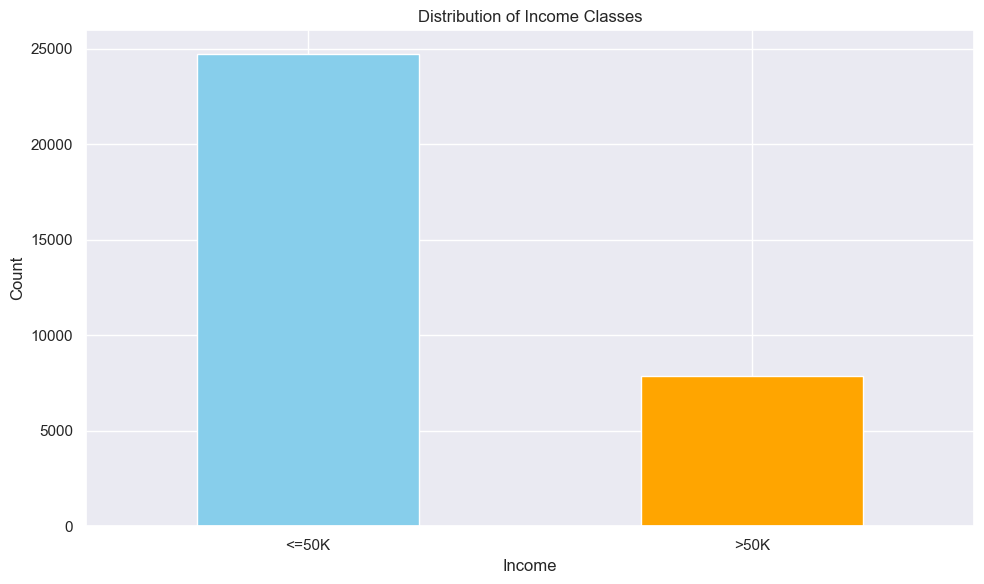

In [2]:
# Load the data
data = pd.read_csv("adult.csv")

# Basic info
print("Dataset Shape:", data.shape)
print("\n" + "="*80)
print(data.info())
print("\n" + "="*80)
print(data.describe())

# Check for missing values (including '?' which is common in Adult dataset)
print("\n" + "="*80)
print("Missing Values:")
print(data.isnull().sum())

print("\n" + "="*80)
print("Checking for '?' values:")
for col in data.select_dtypes(include=['object']).columns:
    question_marks = (data[col] == '?').sum()
    if question_marks > 0:
        print(f"{col}: {question_marks} '?' values")

# Distribution of target variable
print("\n" + "="*80)
print("Income Distribution:")
print(data["income"].value_counts())
print("\nIncome Proportions:")
print(data["income"].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
data["income"].value_counts().plot(kind="bar", color=['skyblue', 'orange'])
plt.title("Distribution of Income Classes")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Numeric columns (6): ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


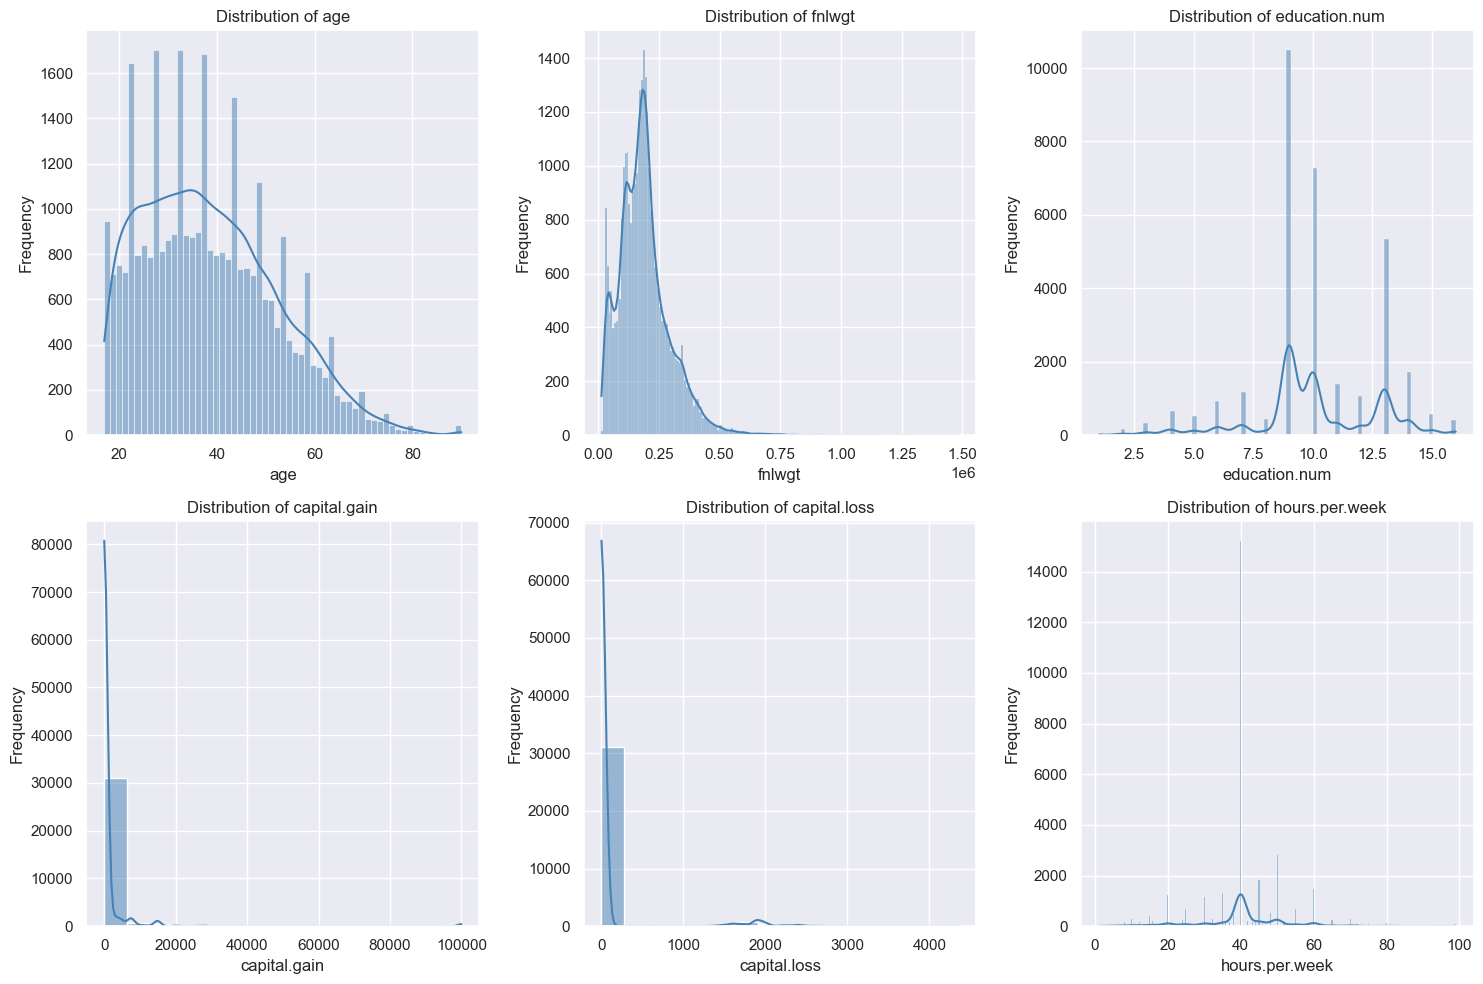

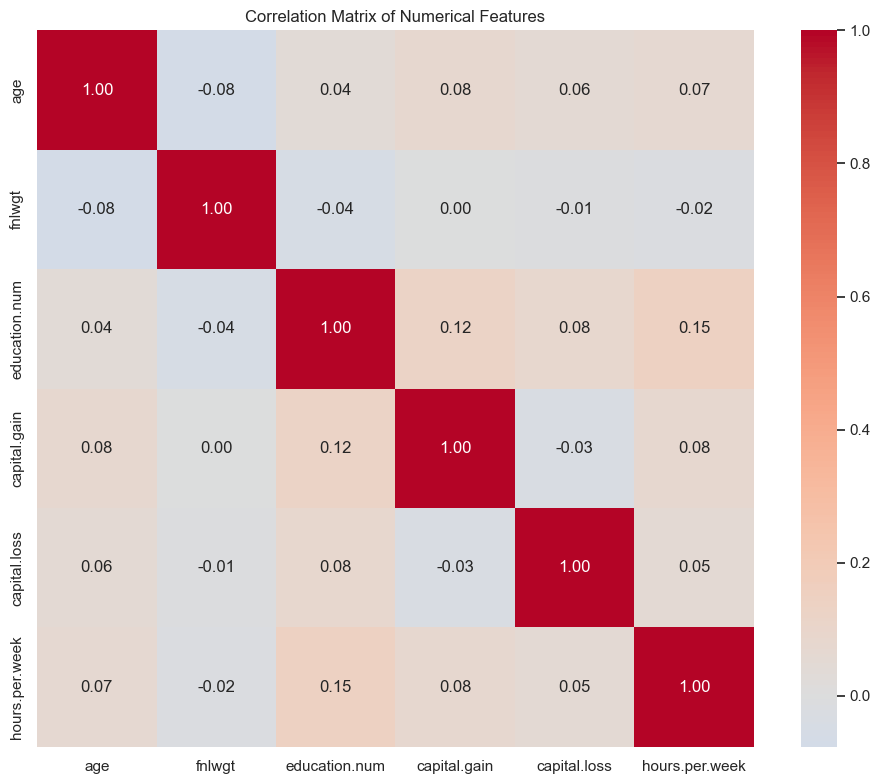

In [3]:
# Analyze numeric features
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")

# Distribution of numeric features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.histplot(data[col], kde=True, ax=axes[i], color='steelblue')
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

# Remove empty subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

C:\Users\WG\AppData\Local\Temp\ipykernel_19756\2437095430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y="age", data=data, palette="Set2")


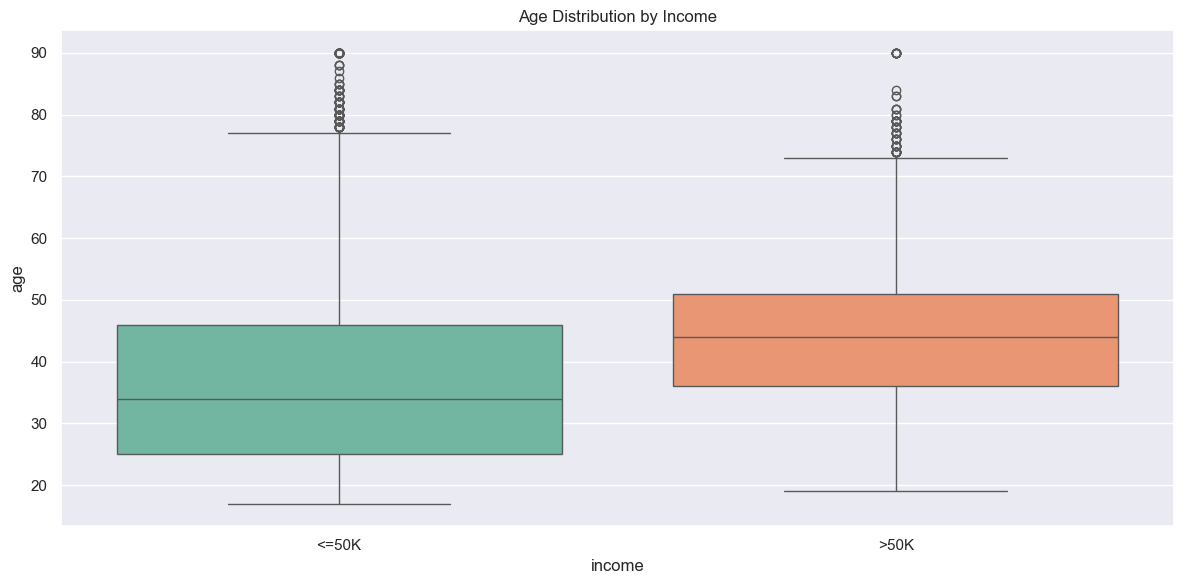

C:\Users\WG\AppData\Local\Temp\ipykernel_19756\2437095430.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y="hours.per.week", data=data, palette="Set2")


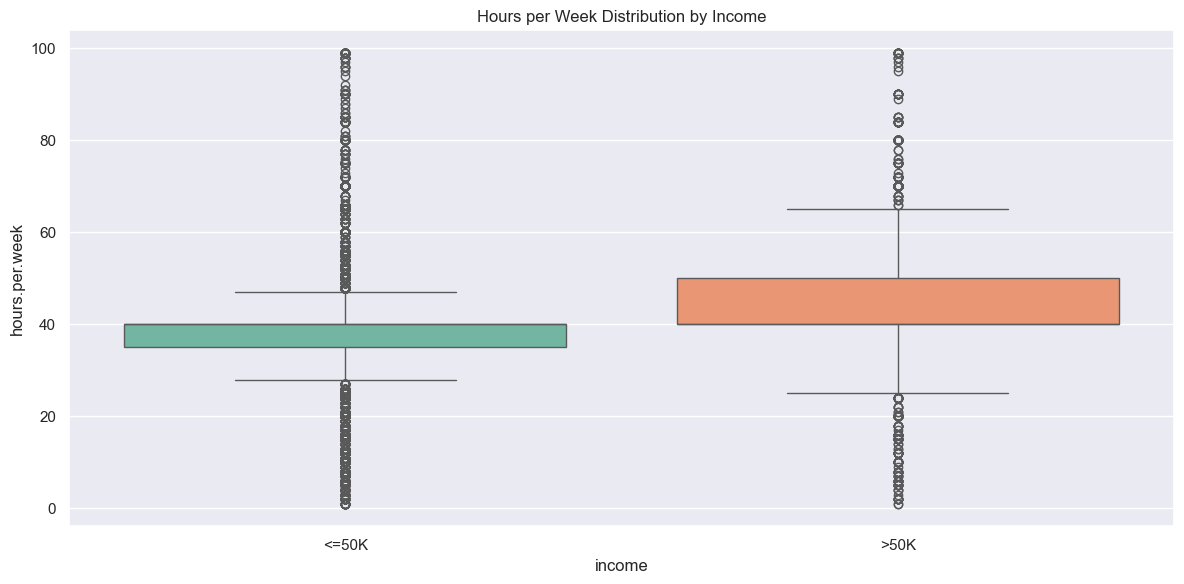

C:\Users\WG\AppData\Local\Temp\ipykernel_19756\2437095430.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y="education.num", data=data, palette="Set2")


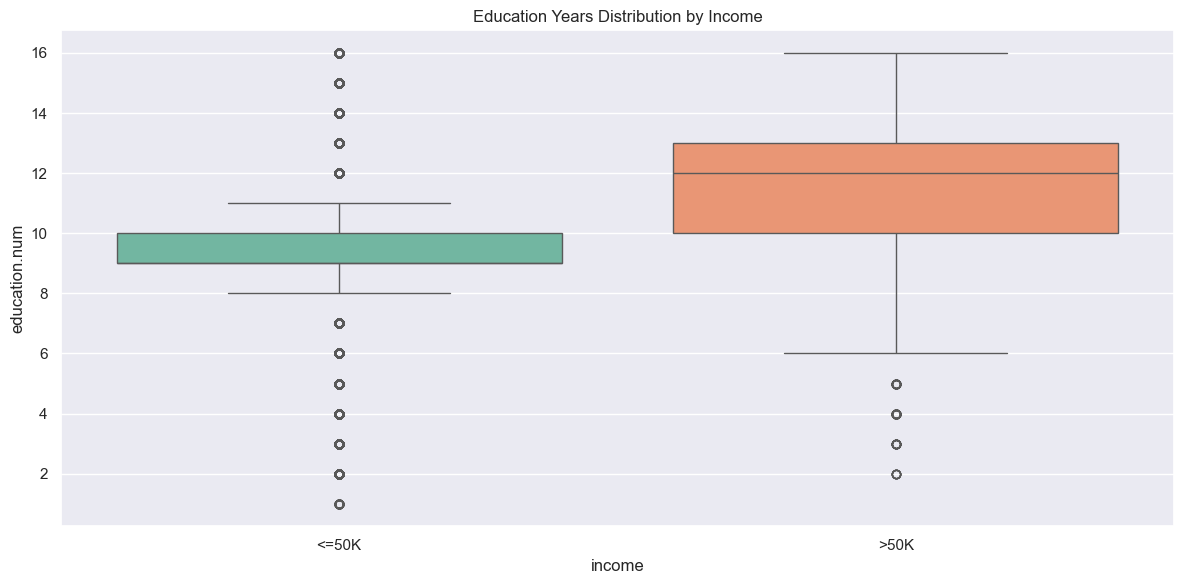

In [4]:
# Age distribution by income
plt.figure(figsize=(12, 6))
sns.boxplot(x="income", y="age", data=data, palette="Set2")
plt.title("Age Distribution by Income")
plt.tight_layout()
plt.show()

# Hours per week by income
plt.figure(figsize=(12, 6))
sns.boxplot(x="income", y="hours.per.week", data=data, palette="Set2")
plt.title("Hours per Week Distribution by Income")
plt.tight_layout()
plt.show()

# Education years by income
plt.figure(figsize=(12, 6))
sns.boxplot(x="income", y="education.num", data=data, palette="Set2")
plt.title("Education Years Distribution by Income")
plt.tight_layout()
plt.show()

Categorical columns (8): ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


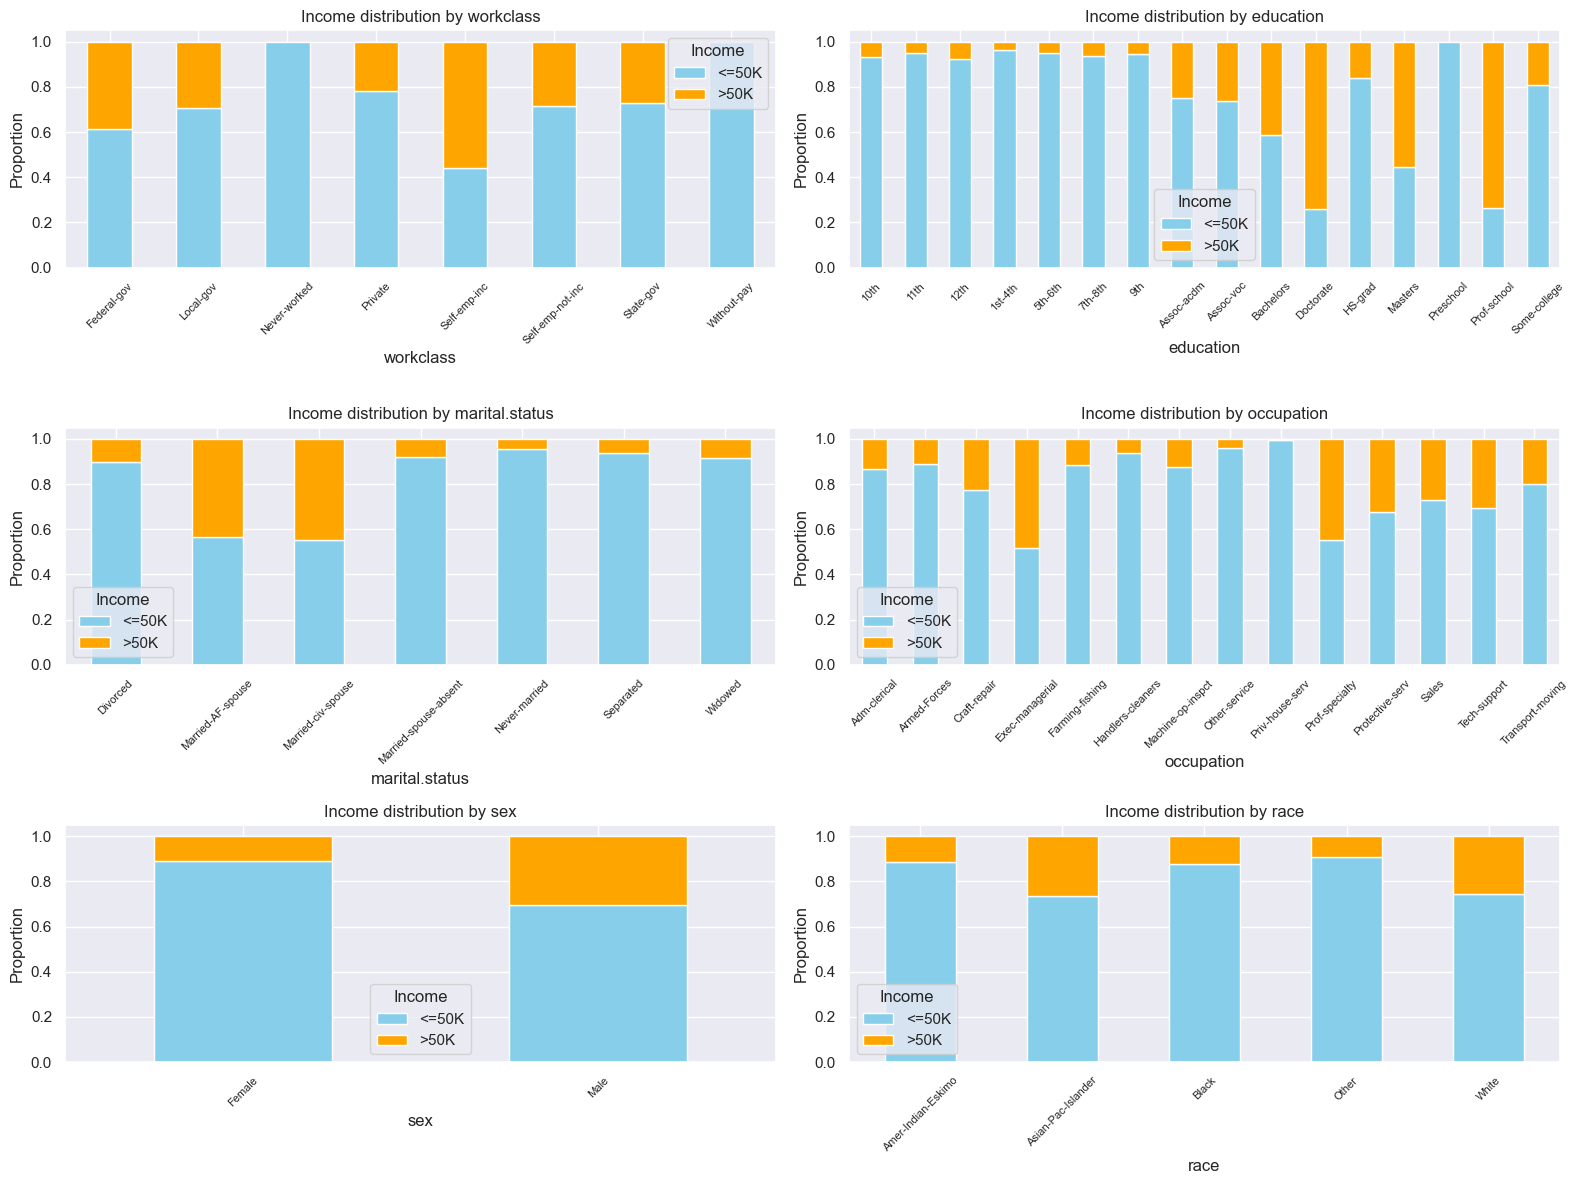

In [5]:
# Analyze categorical features vs target
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
categorical_cols.remove("income")  # Remove target

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Plot key categorical features
key_cats = ["workclass", "education", "marital.status", "occupation", "sex", "race"]
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(key_cats):
    if col in data.columns and i < len(axes):
        # Filter out '?' values for better visualization
        data_filtered = data[data[col] != '?']
        pd.crosstab(data_filtered[col], data_filtered["income"], normalize="index").plot(
            kind="bar", stacked=True, ax=axes[i], color=['skyblue', 'orange']
        )
        axes[i].set_title(f"Income distribution by {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Proportion")
        axes[i].legend(title="Income", loc='best')
        axes[i].tick_params(axis="x", rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

## Data Descriptions

- **age** — Continuous  
- **workclass** — Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked  
- **fnlwgt** — Continuous  
- **education** — Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool  
- **education-num** — Continuous  
- **marital-status** — Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse  
- **occupation** — Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces  
- **relationship** — Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried  
- **race** — White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black  
- **sex** — Female, Male  
- **capital-gain** — Continuous  
- **capital-loss** — Continuous  
- **hours-per-week** — Continuous  
- **native-country** — United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands  
- **salary** — >50K, <=50K  

## Data Preprocessing

In [ ]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # Replace '?' with NaN
    df = df.replace('?', np.nan)
    
    # Handle missing values: median for numeric, mode for categorical
    for col in df.columns:
        if df[col].dtype != "object":
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "None")
    
    # Encode categorical variables using LabelEncoder
    for col in df.select_dtypes(include=["object"]).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    
    return df

# Separate features and target
X = data.drop("income", axis=1)
y = data["income"]

# Encode target: <=50K -> 0, >50K -> 1
le_target = LabelEncoder()
y = le_target.fit_transform(y)

print(f"Target classes: {le_target.classes_}")
print(f"Target encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")
print(f"\nClass distribution in encoded target:")
print(pd.Series(y).value_counts().sort_index())

# Preprocess features
X_processed = preprocess_data(X)

# Split data into train and test sets (80-20 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nProcessed shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"\nFeatures: {list(X_processed.columns)}")

Target classes: ['<=50K' '>50K']
Target encoding: {'<=50K': np.int64(0), '>50K': np.int64(1)}

Class distribution in encoded target:
0    24720
1     7841
Name: count, dtype: int64

Processed shapes:
X_train: (26048, 14)
X_test: (6513, 14)
y_train: (26048,)
y_test: (6513,)

Features: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']


## Model Training and Evaluation

In [7]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Get prediction probabilities if available
    if hasattr(model, "predict_proba"):
        train_pred_proba = model.predict_proba(X_train)[:, 1]
        test_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        train_pred_proba = None
        test_pred_proba = None

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred)
    
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    if train_pred_proba is not None and test_pred_proba is not None:
        train_auc = roc_auc_score(y_train, train_pred_proba)
        test_auc = roc_auc_score(y_test, test_pred_proba)
    else:
        train_auc = None
        test_auc = None

    print(f"{model_name} Results:")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Train Precision: {train_precision:.4f}")
    print(f"Train Recall: {train_recall:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}")
    if train_auc is not None:
        print(f"Train AUC-ROC: {train_auc:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    if test_auc is not None:
        print(f"Test AUC-ROC: {test_auc:.4f}")
    print("\n")

    return model, (y_train, train_pred, y_test, test_pred, train_pred_proba, test_pred_proba)

# Train baseline models
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
}

baseline_results = {}
for name, model in baseline_models.items():
    baseline_results[name] = train_and_evaluate(
        model, X_train_scaled, y_train, X_test_scaled, y_test, name
    )

Logistic Regression Results:
Train Accuracy: 0.8253
Train Precision: 0.7171
Train Recall: 0.4534
Train F1 Score: 0.5555
Train AUC-ROC: 0.8546
Test Accuracy: 0.8254
Test Precision: 0.7170
Test Recall: 0.4541
Test F1 Score: 0.5560
Test AUC-ROC: 0.8545


Naive Bayes Results:
Train Accuracy: 0.8076
Train Precision: 0.6986
Train Recall: 0.3539
Train F1 Score: 0.4698
Train AUC-ROC: 0.8572
Test Accuracy: 0.8056
Test Precision: 0.6897
Test Recall: 0.3501
Test F1 Score: 0.4645
Test AUC-ROC: 0.8525




In [8]:
# Train advanced models
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_trained, rf_results = train_and_evaluate(
    rf_model, X_train, y_train, X_test, y_test, "Random Forest"
)

if lgb is not None:
    lgb_model = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1)
    lgb_trained, lgb_results = train_and_evaluate(
        lgb_model, X_train, y_train, X_test, y_test, "LightGBM"
    )
else:
    lgb_trained, lgb_results = None, None

if xgb is not None:
    xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss')
    xgb_trained, xgb_results = train_and_evaluate(
        xgb_model, X_train, y_train, X_test, y_test, "XGBoost"
    )
else:
    xgb_trained, xgb_results = None, None

if cbt is not None:
    cbt_model = cbt.CatBoostClassifier(random_state=42, verbose=False)
    cbt_trained, cbt_results = train_and_evaluate(
        cbt_model, X_train, y_train, X_test, y_test, "CatBoost"
    )
else:
    cbt_trained, cbt_results = None, None

Random Forest Results:
Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 0.9998
Train F1 Score: 0.9999
Train AUC-ROC: 1.0000
Test Accuracy: 0.8558
Test Precision: 0.7399
Test Recall: 0.6186
Test F1 Score: 0.6738
Test AUC-ROC: 0.9026


LightGBM Results:
Train Accuracy: 0.8897
Train Precision: 0.8181
Train Recall: 0.6970
Train F1 Score: 0.7527
Train AUC-ROC: 0.9490
Test Accuracy: 0.8696
Test Precision: 0.7730
Test Recall: 0.6492
Test F1 Score: 0.7057
Test AUC-ROC: 0.9224


XGBoost Results:
Train Accuracy: 0.9104
Train Precision: 0.8591
Train Recall: 0.7513
Train F1 Score: 0.8016
Train AUC-ROC: 0.9645
Test Accuracy: 0.8669
Test Precision: 0.7641
Test Recall: 0.6467
Test F1 Score: 0.7005
Test AUC-ROC: 0.9199


CatBoost Results:
Train Accuracy: 0.9016
Train Precision: 0.8448
Train Recall: 0.7244
Train F1 Score: 0.7800
Train AUC-ROC: 0.9559
Test Accuracy: 0.8716
Test Precision: 0.7777
Test Recall: 0.6537
Test F1 Score: 0.7103
Test AUC-ROC: 0.9216




## Model Performance Visualization

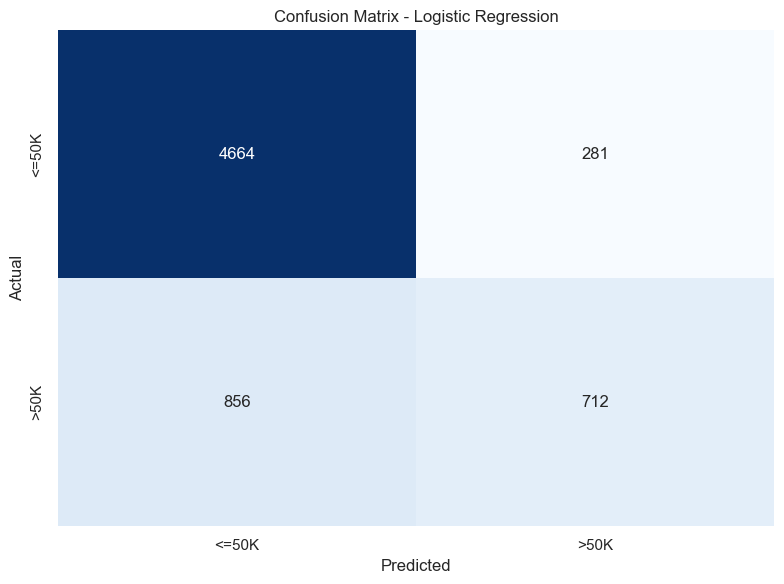

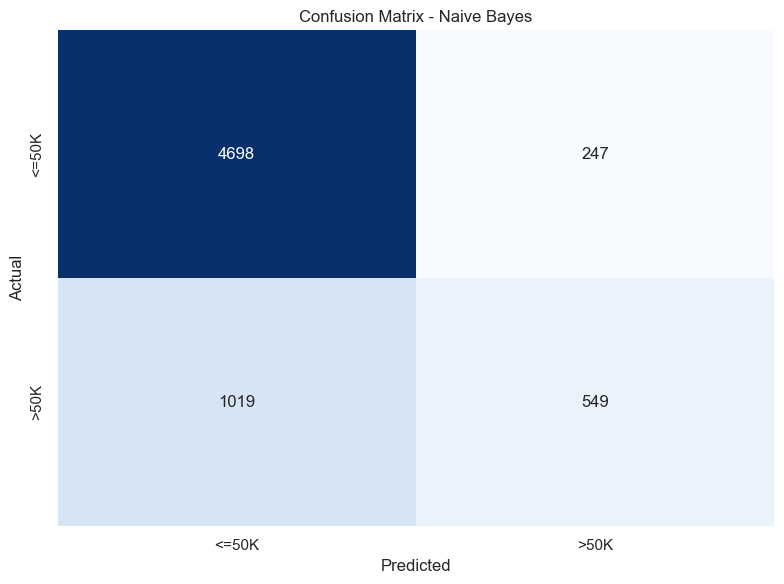

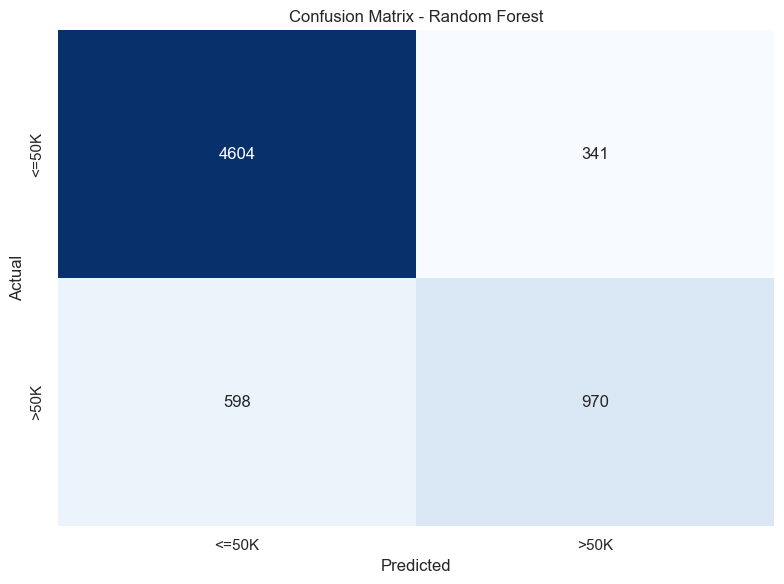

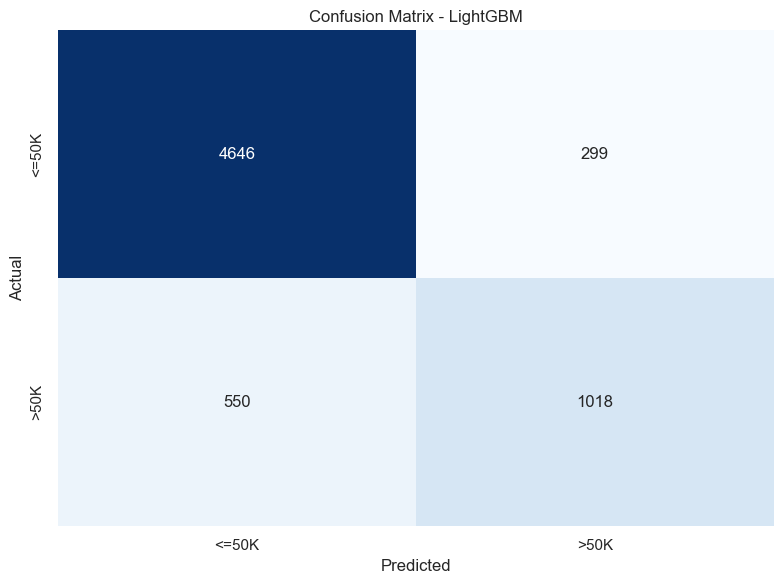

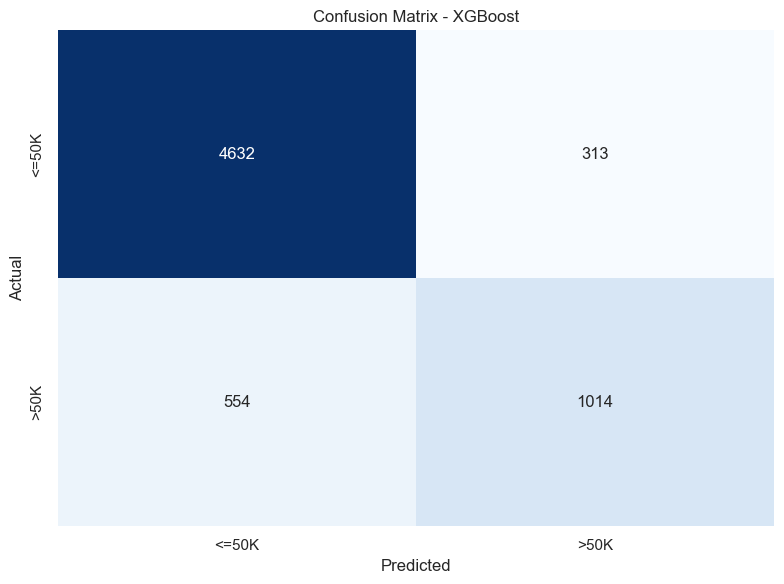

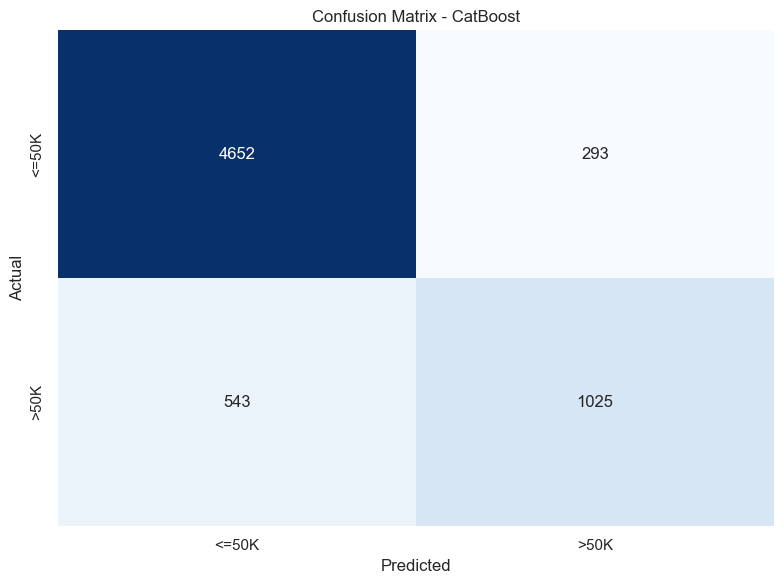

In [9]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for all models
for name, (model, results) in baseline_results.items():
    y_train, train_pred, y_test, test_pred, _, _ = results
    plot_confusion_matrix(y_test, test_pred, name)

if rf_results:
    plot_confusion_matrix(rf_results[2], rf_results[3], "Random Forest")

if lgb_results:
    plot_confusion_matrix(lgb_results[2], lgb_results[3], "LightGBM")

if xgb_results:
    plot_confusion_matrix(xgb_results[2], xgb_results[3], "XGBoost")

if cbt_results:
    plot_confusion_matrix(cbt_results[2], cbt_results[3], "CatBoost")

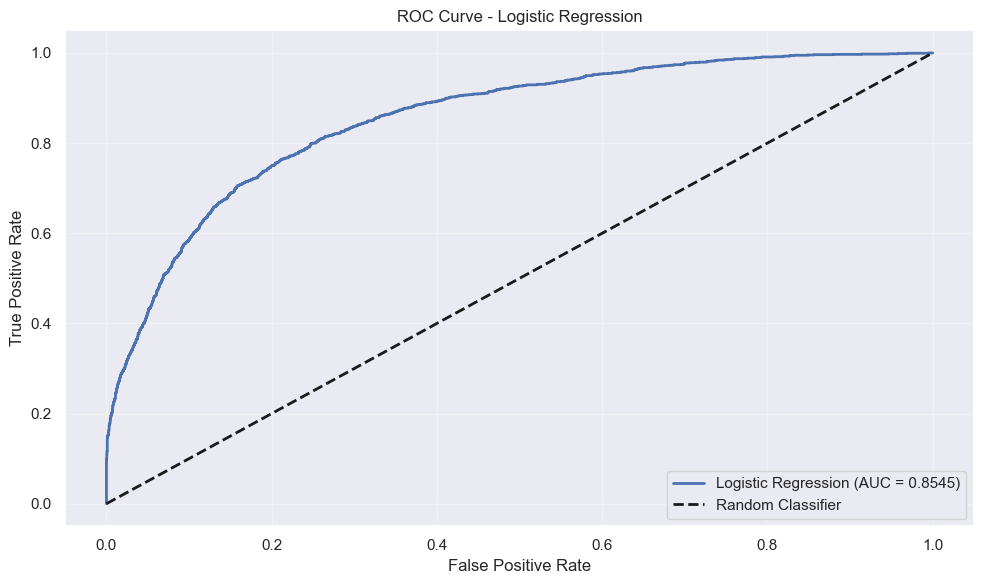

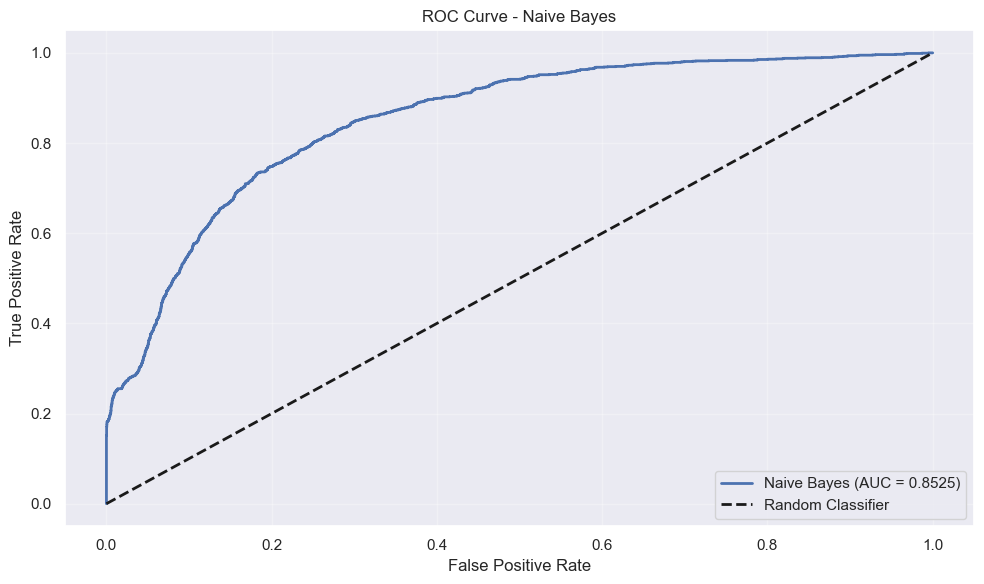

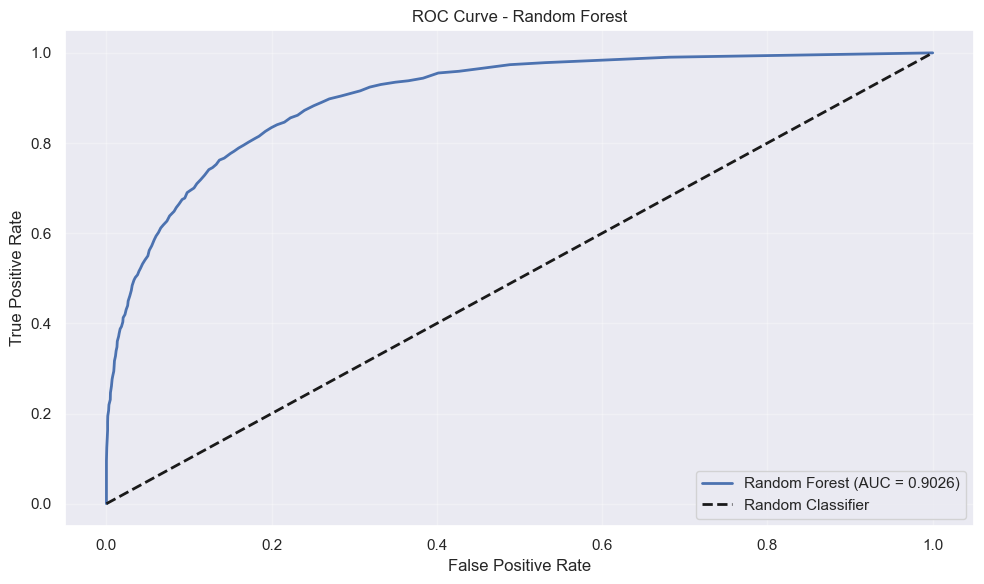

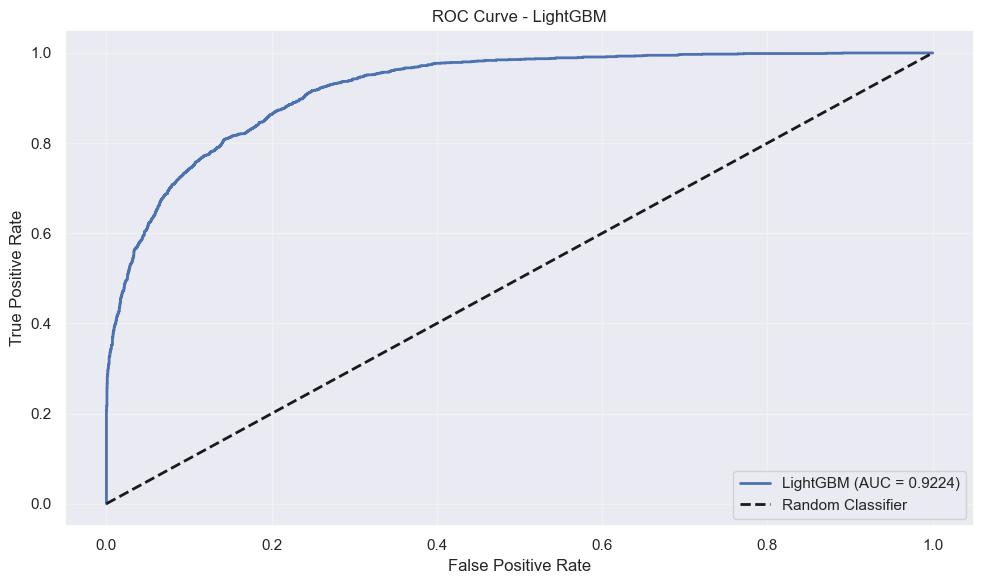

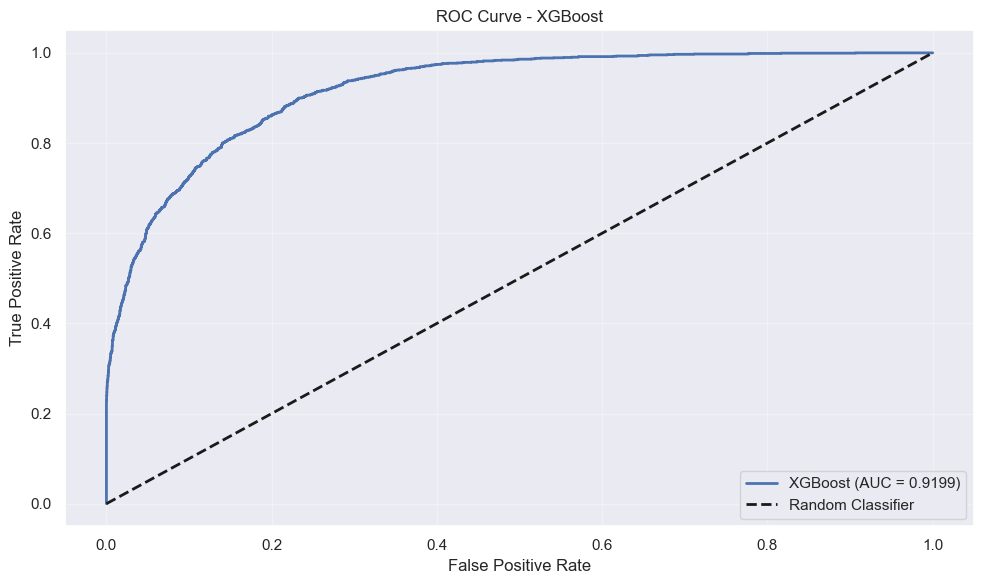

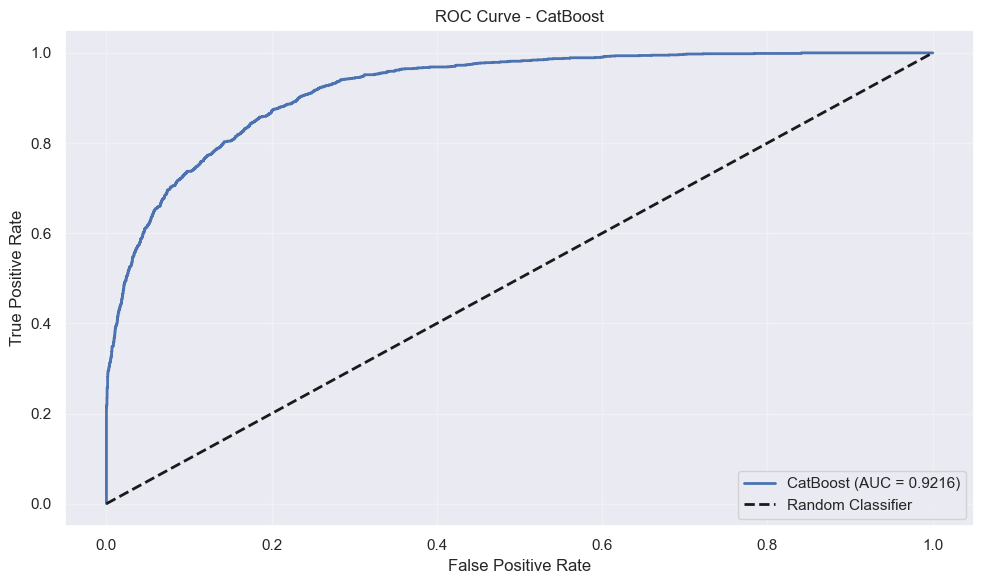

In [10]:
def plot_roc_curve(y_true, y_pred_proba, model_name):
    if y_pred_proba is None:
        print(f"ROC curve not available for {model_name} (no probability predictions)")
        return
    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f"{model_name} (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], "k--", linewidth=2, label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot ROC curves for all models
for name, (model, results) in baseline_results.items():
    y_train, train_pred, y_test, test_pred, _, test_pred_proba = results
    plot_roc_curve(y_test, test_pred_proba, name)

if rf_results:
    plot_roc_curve(rf_results[2], rf_results[5], "Random Forest")

if lgb_results:
    plot_roc_curve(lgb_results[2], lgb_results[5], "LightGBM")

if xgb_results:
    plot_roc_curve(xgb_results[2], xgb_results[5], "XGBoost")

if cbt_results:
    plot_roc_curve(cbt_results[2], cbt_results[5], "CatBoost")

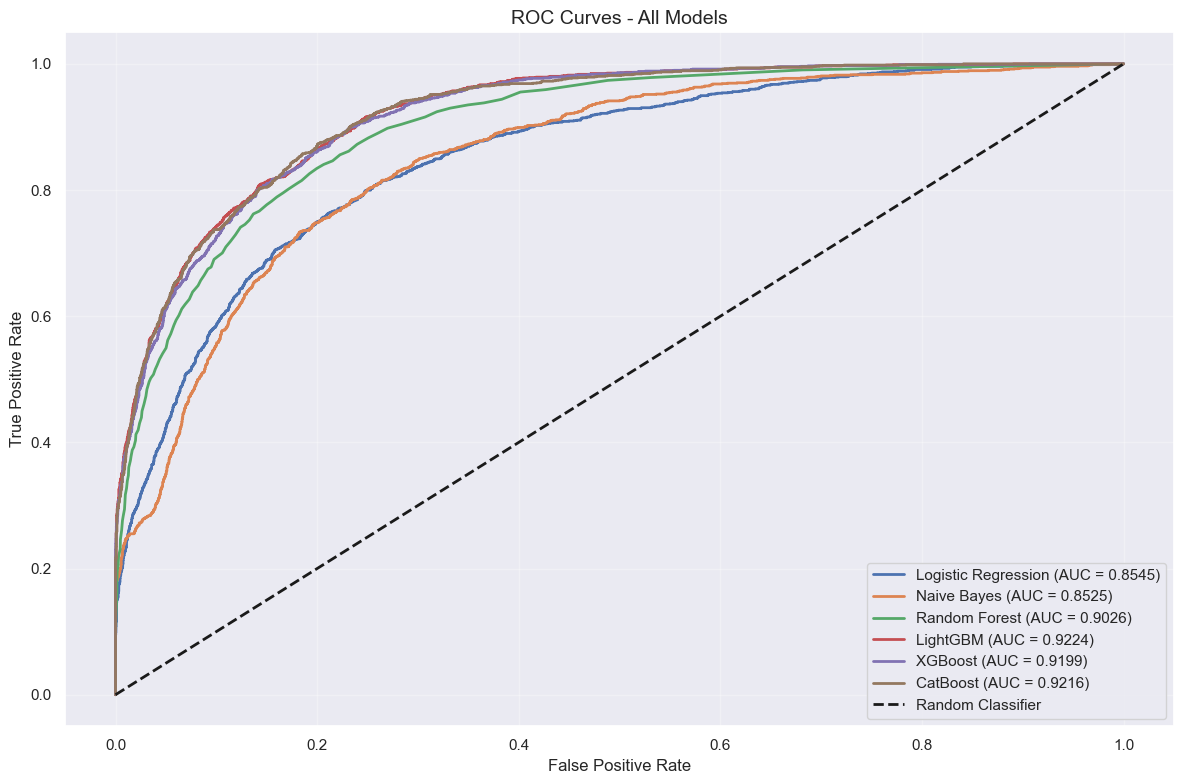

In [11]:
# Plot all ROC curves on one plot
plt.figure(figsize=(12, 8))

for name, (model, results) in baseline_results.items():
    y_train, train_pred, y_test, test_pred, _, test_pred_proba = results
    if test_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, test_pred_proba)
        auc = roc_auc_score(y_test, test_pred_proba)
        plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {auc:.4f})")

if rf_results and rf_results[5] is not None:
    fpr, tpr, _ = roc_curve(rf_results[2], rf_results[5])
    auc = roc_auc_score(rf_results[2], rf_results[5])
    plt.plot(fpr, tpr, linewidth=2, label=f"Random Forest (AUC = {auc:.4f})")

if lgb_results and lgb_results[5] is not None:
    fpr, tpr, _ = roc_curve(lgb_results[2], lgb_results[5])
    auc = roc_auc_score(lgb_results[2], lgb_results[5])
    plt.plot(fpr, tpr, linewidth=2, label=f"LightGBM (AUC = {auc:.4f})")

if xgb_results and xgb_results[5] is not None:
    fpr, tpr, _ = roc_curve(xgb_results[2], xgb_results[5])
    auc = roc_auc_score(xgb_results[2], xgb_results[5])
    plt.plot(fpr, tpr, linewidth=2, label=f"XGBoost (AUC = {auc:.4f})")

if cbt_results and cbt_results[5] is not None:
    fpr, tpr, _ = roc_curve(cbt_results[2], cbt_results[5])
    auc = roc_auc_score(cbt_results[2], cbt_results[5])
    plt.plot(fpr, tpr, linewidth=2, label=f"CatBoost (AUC = {auc:.4f})")

plt.plot([0, 1], [0, 1], "k--", linewidth=2, label="Random Classifier")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves - All Models", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Feature Importance

C:\Users\WG\AppData\Local\Temp\ipykernel_19756\833071812.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_imp, palette="viridis")


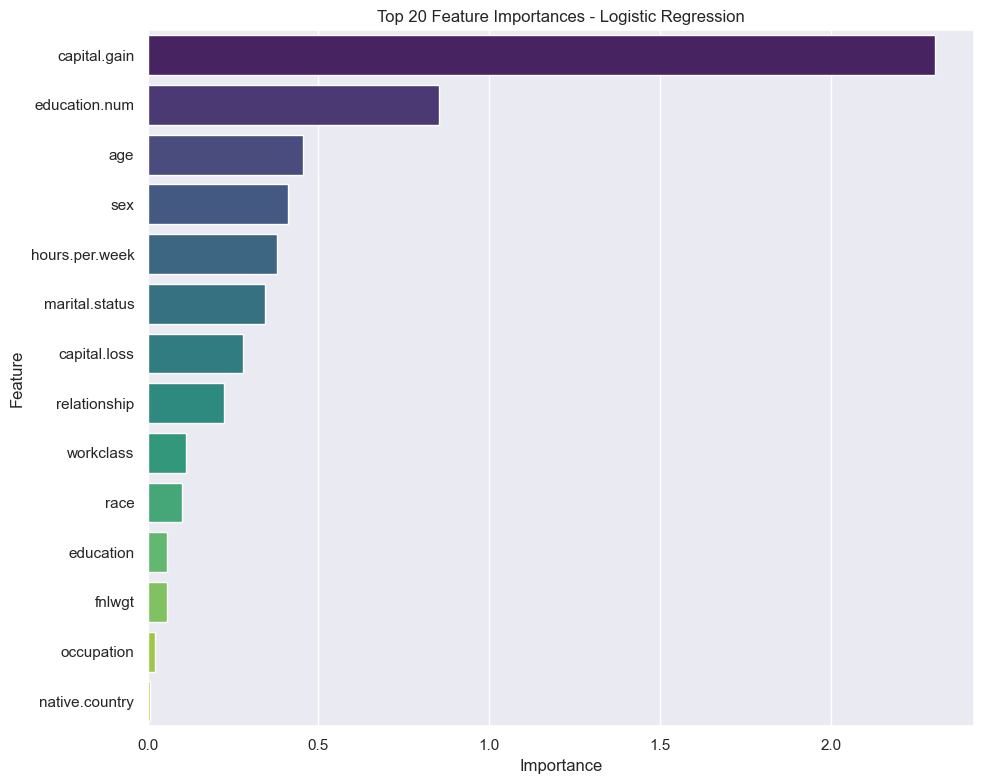

C:\Users\WG\AppData\Local\Temp\ipykernel_19756\833071812.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_imp, palette="viridis")


Feature importance not available for Naive Bayes


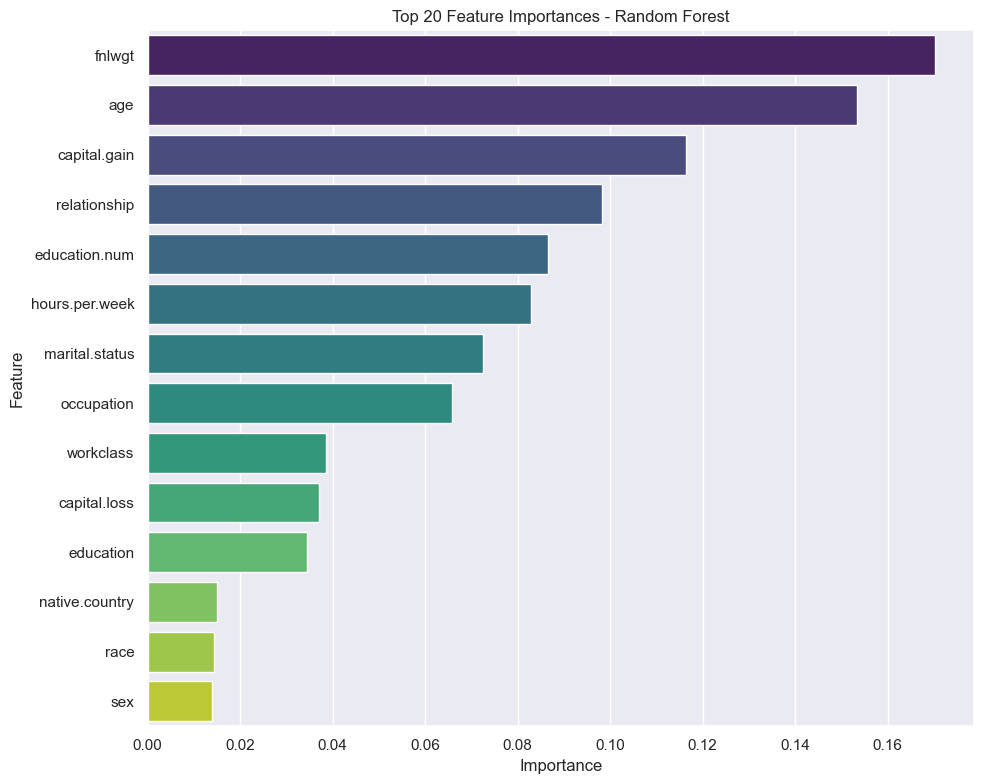

C:\Users\WG\AppData\Local\Temp\ipykernel_19756\833071812.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_imp, palette="viridis")


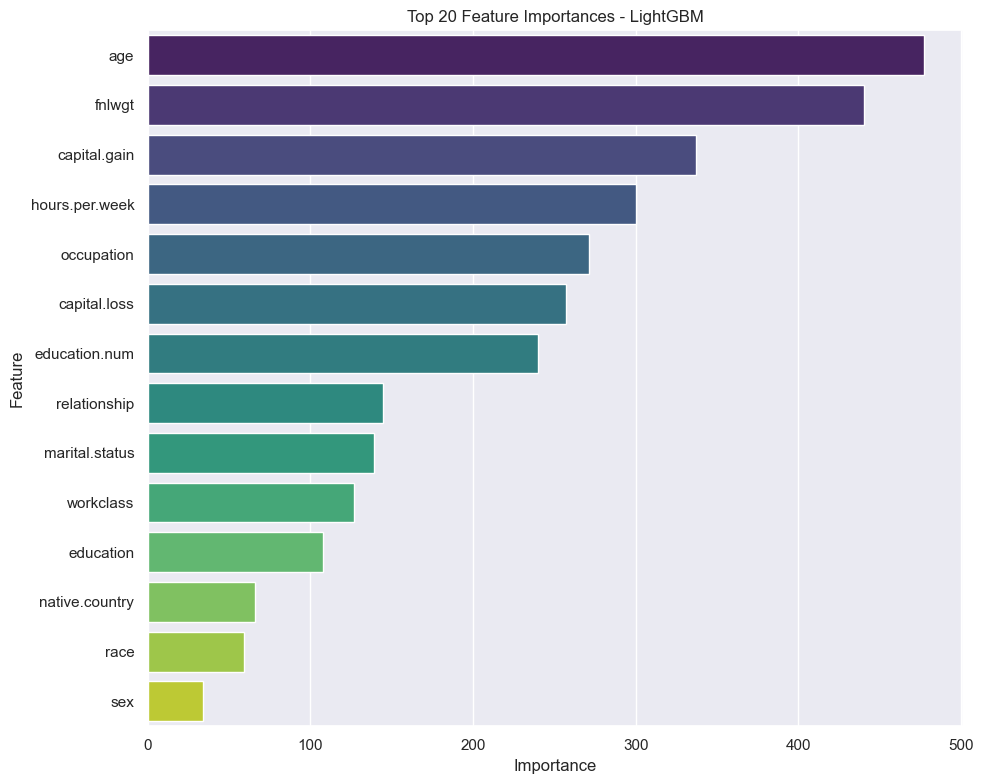

C:\Users\WG\AppData\Local\Temp\ipykernel_19756\833071812.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_imp, palette="viridis")


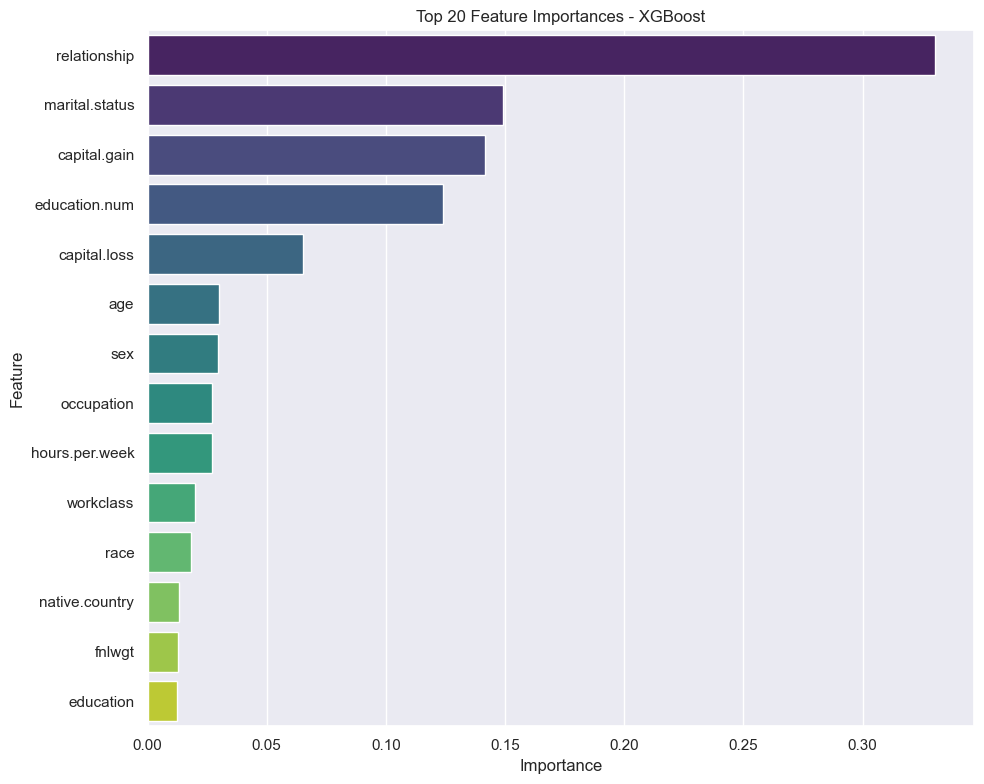

C:\Users\WG\AppData\Local\Temp\ipykernel_19756\833071812.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_imp, palette="viridis")


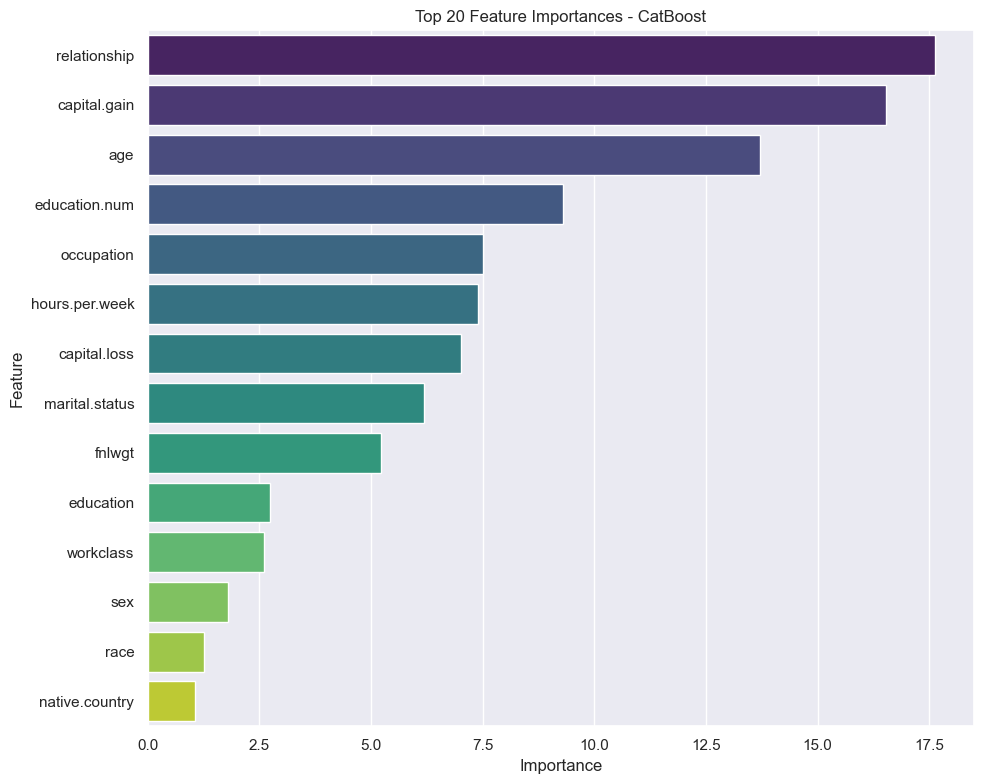

In [12]:
def plot_feature_importance(model, X_df, model_name, top_n=20):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "feature_importance"):
        importances = model.feature_importance()
    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_[0])
    else:
        print(f"Feature importance not available for {model_name}")
        return

    feature_imp = pd.DataFrame({
        "feature": X_df.columns,
        "importance": importances
    }).sort_values("importance", ascending=False).head(top_n)

    plt.figure(figsize=(10, 8))
    sns.barplot(x="importance", y="feature", data=feature_imp, palette="viridis")
    plt.title(f"Top {top_n} Feature Importances - {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Plot feature importance for models that support it
for name, (model, results) in baseline_results.items():
    plot_feature_importance(model, X_train, name)

plot_feature_importance(rf_trained, X_train, "Random Forest")

if lgb_trained is not None:
    plot_feature_importance(lgb_trained, X_train, "LightGBM")

if xgb_trained is not None:
    plot_feature_importance(xgb_trained, X_train, "XGBoost")

if cbt_trained is not None:
    plot_feature_importance(cbt_trained, X_train, "CatBoost")

## Hyperparameter Tuning

In [13]:
def tune_hyperparameters(model, param_grid, X_train, y_train, model_name):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring="f1",
        verbose=1,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best F1 Score: {grid_search.best_score_:.4f}\n")
    return grid_search.best_estimator_

# Random Forest tuning
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}
rf_tuned = tune_hyperparameters(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    X_train,
    y_train,
    "Random Forest",
)

# LightGBM tuning
if lgb is not None:
    lgb_param_grid = {
        "num_leaves": [31, 50],
        "learning_rate": [0.01, 0.1],
        "n_estimators": [100, 200],
    }
    lgb_tuned = tune_hyperparameters(
        lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1),
        lgb_param_grid,
        X_train,
        y_train,
        "LightGBM",
    )
else:
    lgb_tuned = None

# XGBoost tuning
if xgb is not None:
    xgb_param_grid = {
        "max_depth": [3, 6, 9],
        "learning_rate": [0.01, 0.1],
        "n_estimators": [100, 200],
    }
    xgb_tuned = tune_hyperparameters(
        xgb.XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss'),
        xgb_param_grid,
        X_train,
        y_train,
        "XGBoost",
    )
else:
    xgb_tuned = None

# CatBoost tuning
if cbt is not None:
    cbt_param_grid = {
        "depth": [6, 8],
        "learning_rate": [0.01, 0.1],
        "iterations": [100, 200],
    }
    cbt_tuned = tune_hyperparameters(
        cbt.CatBoostClassifier(random_state=42, verbose=False),
        cbt_param_grid,
        X_train,
        y_train,
        "CatBoost",
    )
else:
    cbt_tuned = None

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.6899

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for LightGBM:
{'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
Best F1 Score: 0.7130

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best F1 Score: 0.7171

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for CatBoost:
{'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best F1 Score: 0.7095



## Final Model Evaluation

Final Model Evaluation with Tuned Hyperparameters:

Random Forest (Tuned) Results:
Train Accuracy: 0.9749
Train Precision: 0.9779
Train Recall: 0.9165
Train F1 Score: 0.9462
Train AUC-ROC: 0.9983
Test Accuracy: 0.8587
Test Precision: 0.7477
Test Recall: 0.6237
Test F1 Score: 0.6801
Test AUC-ROC: 0.9089


LightGBM (Tuned) Results:
Train Accuracy: 0.9044
Train Precision: 0.8438
Train Recall: 0.7400
Train F1 Score: 0.7885
Train AUC-ROC: 0.9627
Test Accuracy: 0.8696
Test Precision: 0.7721
Test Recall: 0.6505
Test F1 Score: 0.7061
Test AUC-ROC: 0.9223


XGBoost (Tuned) Results:
Train Accuracy: 0.8979
Train Precision: 0.8325
Train Recall: 0.7210
Train F1 Score: 0.7728
Train AUC-ROC: 0.9548
Test Accuracy: 0.8712
Test Precision: 0.7751
Test Recall: 0.6550
Test F1 Score: 0.7100
Test AUC-ROC: 0.9233


CatBoost (Tuned) Results:
Train Accuracy: 0.8878
Train Precision: 0.8205
Train Recall: 0.6837
Train F1 Score: 0.7459
Train AUC-ROC: 0.9428
Test Accuracy: 0.8701
Test Precision: 0.7794
Test Recall: 

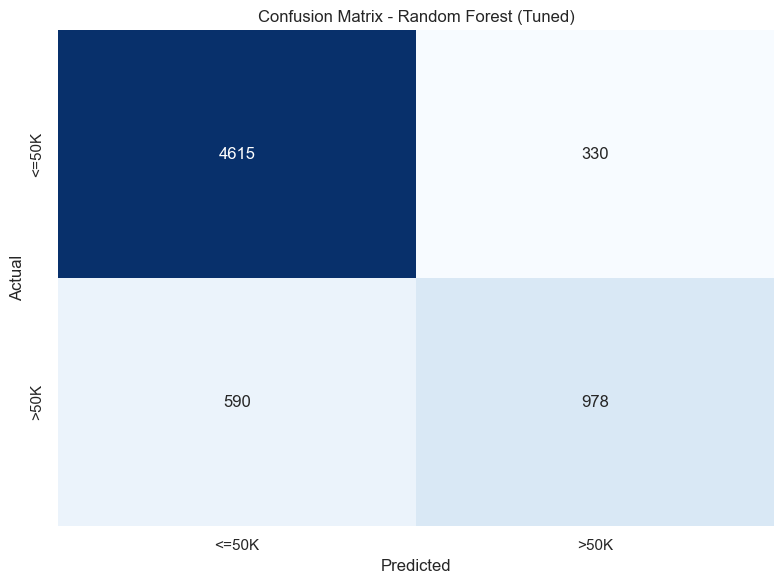

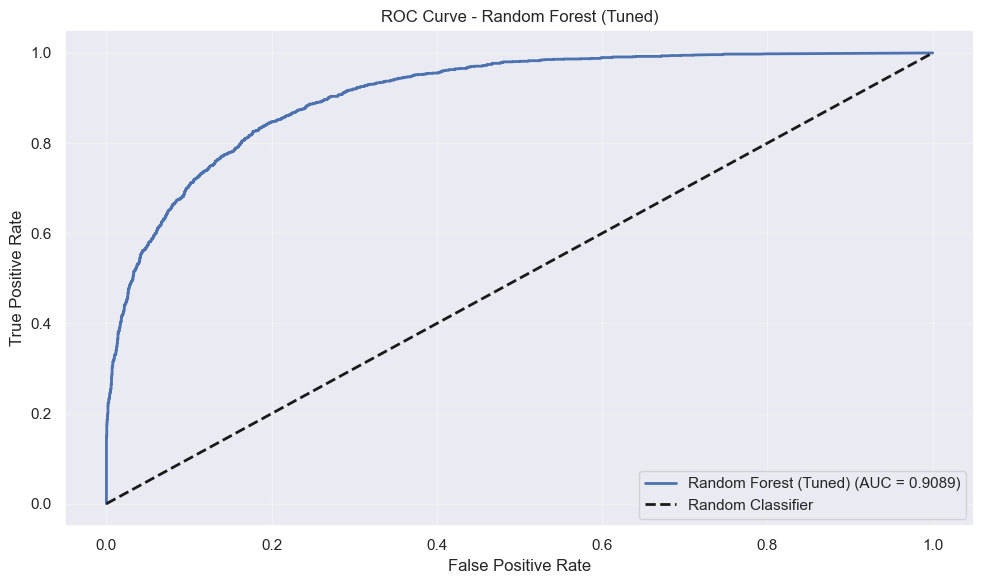

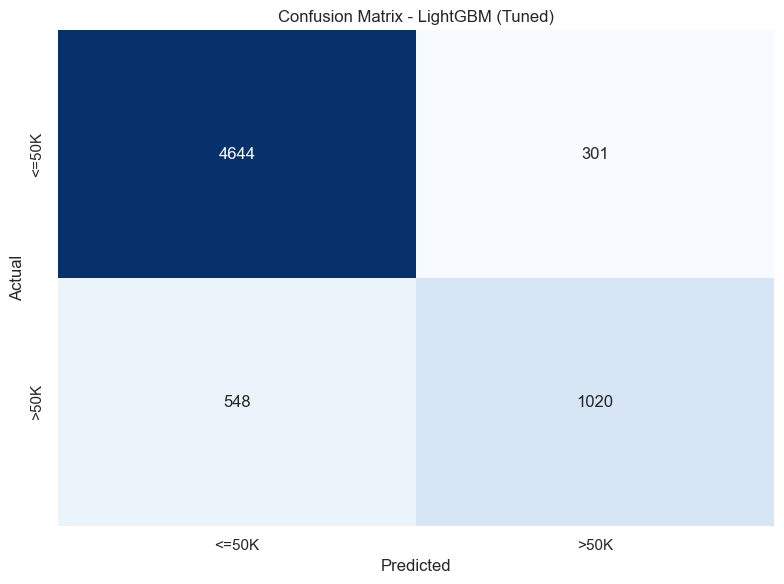

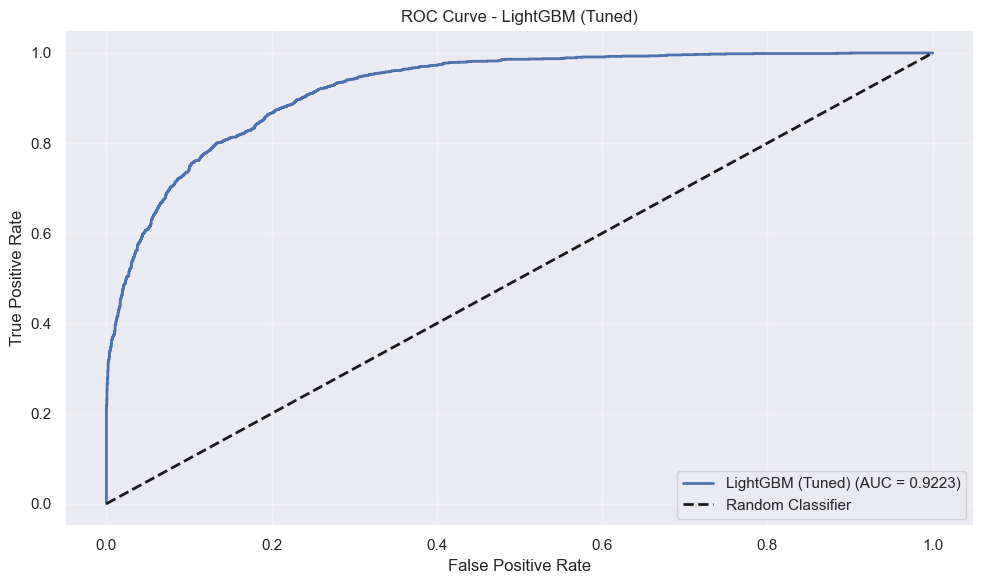

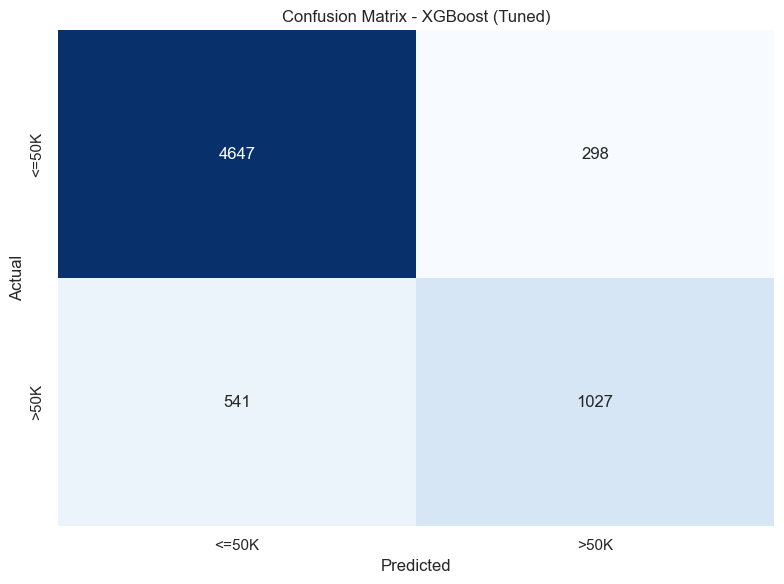

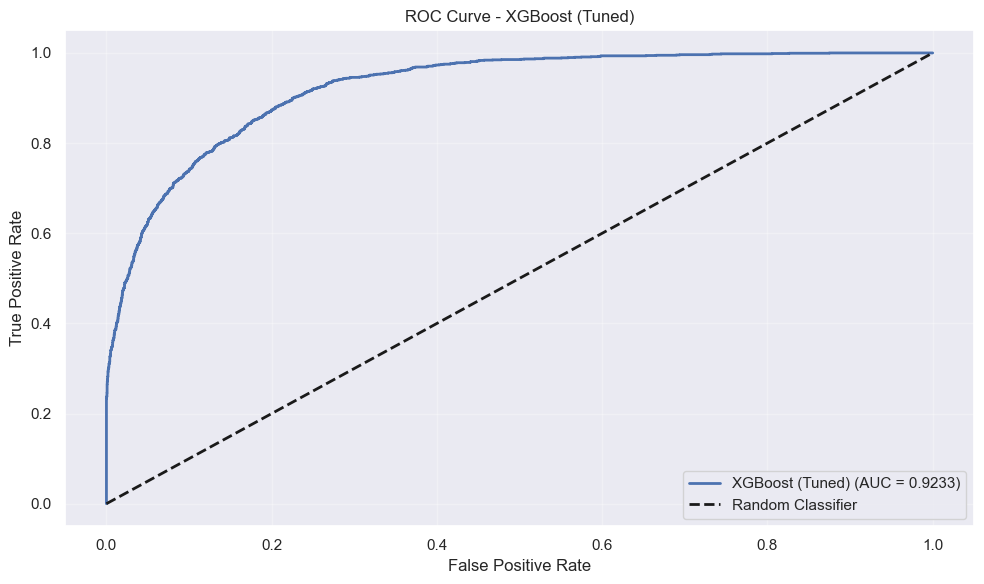

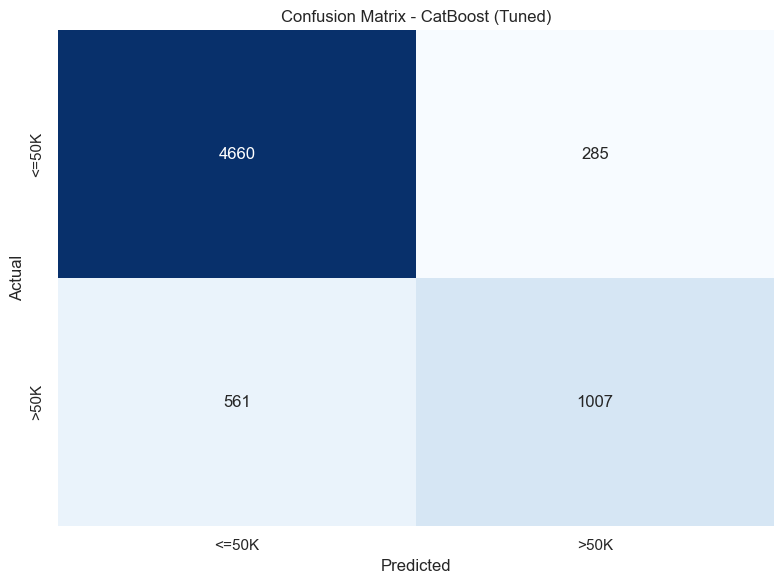

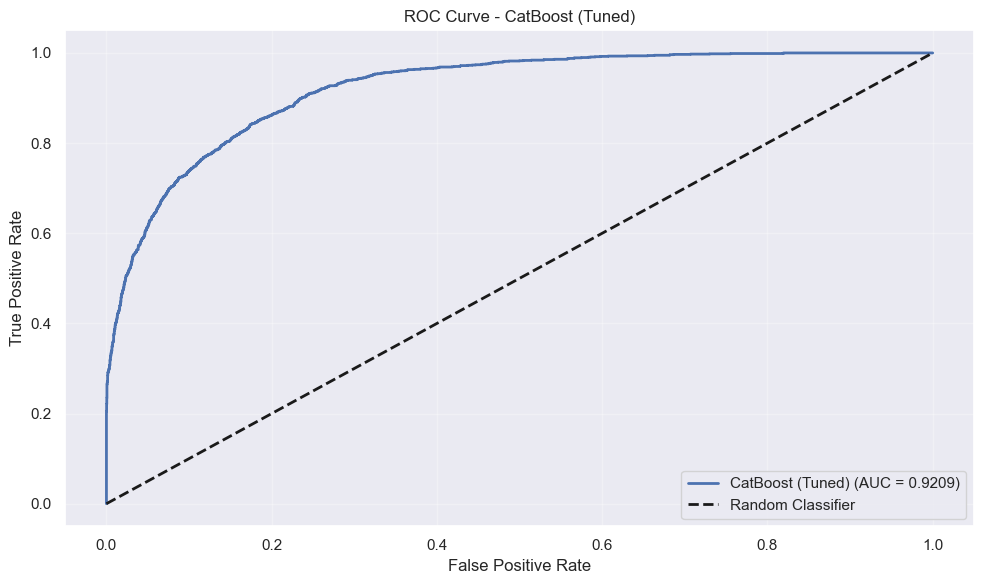

In [14]:
print("Final Model Evaluation with Tuned Hyperparameters:\n")
print("="*80)

rf_final, rf_final_results = train_and_evaluate(
    rf_tuned, X_train, y_train, X_test, y_test, "Random Forest (Tuned)"
)

if lgb_tuned is not None:
    lgb_final, lgb_final_results = train_and_evaluate(
        lgb_tuned, X_train, y_train, X_test, y_test, "LightGBM (Tuned)"
    )
else:
    lgb_final, lgb_final_results = None, None

if xgb_tuned is not None:
    xgb_final, xgb_final_results = train_and_evaluate(
        xgb_tuned, X_train, y_train, X_test, y_test, "XGBoost (Tuned)"
    )
else:
    xgb_final, xgb_final_results = None, None

if cbt_tuned is not None:
    cbt_final, cbt_final_results = train_and_evaluate(
        cbt_tuned, X_train, y_train, X_test, y_test, "CatBoost (Tuned)"
    )
else:
    cbt_final, cbt_final_results = None, None

# Plots for tuned models
plot_confusion_matrix(rf_final_results[2], rf_final_results[3], "Random Forest (Tuned)")
plot_roc_curve(rf_final_results[2], rf_final_results[5], "Random Forest (Tuned)")

if lgb_final_results is not None:
    plot_confusion_matrix(lgb_final_results[2], lgb_final_results[3], "LightGBM (Tuned)")
    plot_roc_curve(lgb_final_results[2], lgb_final_results[5], "LightGBM (Tuned)")

if xgb_final_results is not None:
    plot_confusion_matrix(xgb_final_results[2], xgb_final_results[3], "XGBoost (Tuned)")
    plot_roc_curve(xgb_final_results[2], xgb_final_results[5], "XGBoost (Tuned)")

if cbt_final_results is not None:
    plot_confusion_matrix(cbt_final_results[2], cbt_final_results[3], "CatBoost (Tuned)")
    plot_roc_curve(cbt_final_results[2], cbt_final_results[5], "CatBoost (Tuned)")

## Classification Report

In [15]:
# Detailed classification report for all models
print("="*80)
print("CLASSIFICATION REPORTS")
print("="*80)

for name, (model, results) in baseline_results.items():
    y_train, train_pred, y_test, test_pred, _, _ = results
    print(f"\n{name}:")
    print("-"*80)
    print(classification_report(y_test, test_pred, target_names=le_target.classes_))

print(f"\nRandom Forest (Tuned):")
print("-"*80)
print(classification_report(rf_final_results[2], rf_final_results[3], target_names=le_target.classes_))

if lgb_final_results is not None:
    print(f"\nLightGBM (Tuned):")
    print("-"*80)
    print(classification_report(lgb_final_results[2], lgb_final_results[3], target_names=le_target.classes_))

if xgb_final_results is not None:
    print(f"\nXGBoost (Tuned):")
    print("-"*80)
    print(classification_report(xgb_final_results[2], xgb_final_results[3], target_names=le_target.classes_))

if cbt_final_results is not None:
    print(f"\nCatBoost (Tuned):")
    print("-"*80)
    print(classification_report(cbt_final_results[2], cbt_final_results[3], target_names=le_target.classes_))

CLASSIFICATION REPORTS

Logistic Regression:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4945
        >50K       0.72      0.45      0.56      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.83      0.81      6513


Naive Bayes:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      4945
        >50K       0.69      0.35      0.46      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.65      0.67      6513
weighted avg       0.79      0.81      0.78      6513


Random Forest (Tuned):
--------------------------------------------------------------------------------
              precis

## Model Comparison and Best Model Selection


MODEL PERFORMANCE COMPARISON
                Model  Accuracy  Precision   Recall  F1 Score  AUC-ROC
      XGBoost (Tuned)  0.871181   0.775094 0.654974  0.709990 0.923336
     LightGBM (Tuned)  0.869645   0.772142 0.650510  0.706127 0.922328
     CatBoost (Tuned)  0.870106   0.779412 0.642219  0.704196 0.920851
Random Forest (Tuned)  0.858744   0.747706 0.623724  0.680111 0.908853
  Deep Neural Network  0.847689   0.717195 0.606505  0.657222 0.900074
  Logistic Regression  0.825426   0.717019 0.454082  0.556033 0.854534
          Naive Bayes  0.805620   0.689698 0.350128  0.464467 0.852509

BEST PERFORMING MODEL
Model: XGBoost (Tuned)
Accuracy: 0.8712
Precision: 0.7751
Recall: 0.6550
F1 Score: 0.7100
AUC-ROC: 0.9233


C:\Users\WG\AppData\Local\Temp\ipykernel_19756\4070106540.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, ax=axes[0, 0], palette="Blues_d")
C:\Users\WG\AppData\Local\Temp\ipykernel_19756\4070106540.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")
C:\Users\WG\AppData\Local\Temp\ipykernel_19756\4070106540.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Precision", data=results_df, ax=axes[0, 1], palette="Greens_d")
C:\Users\WG\AppData\Local\Temp\ipykernel_1975

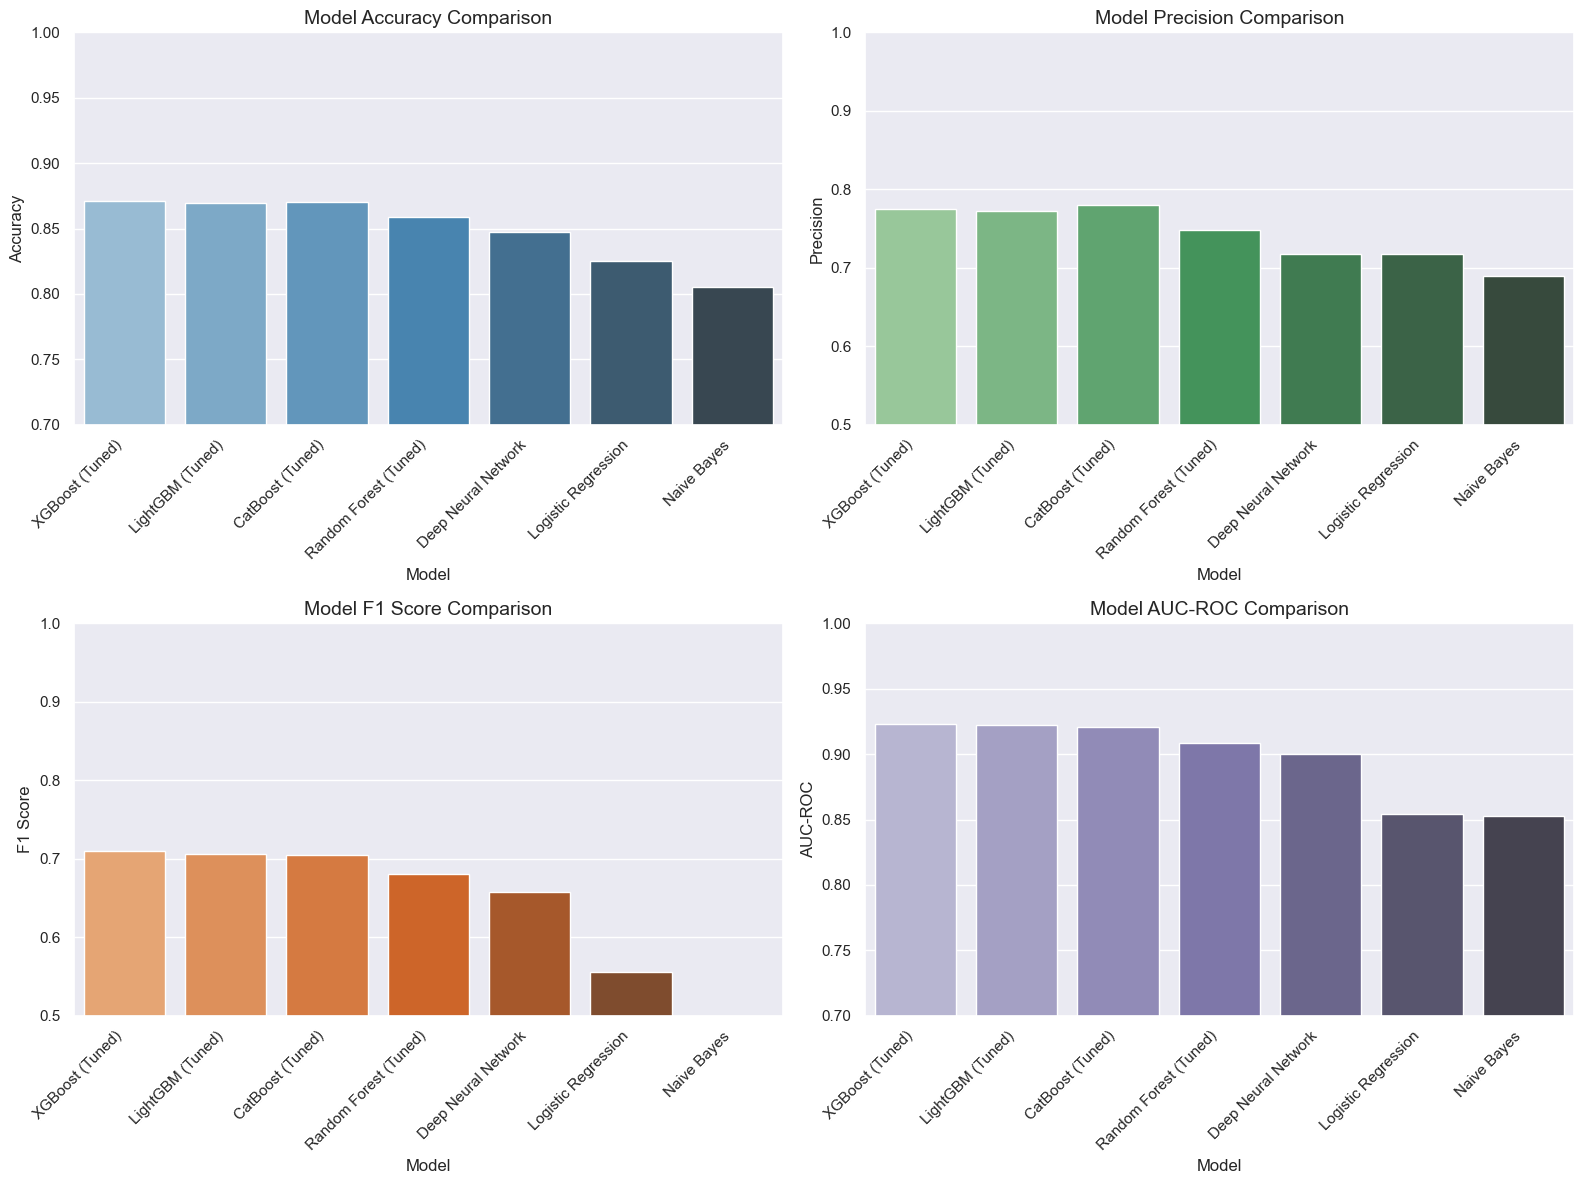

In [22]:
def evaluate_model_summary(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    if y_pred_proba is not None:
        auc = roc_auc_score(y_true, y_pred_proba)
    else:
        auc = None
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc,
    }

model_results = []

for name, (model, results) in baseline_results.items():
    y_train, train_pred, y_test, test_pred, _, test_pred_proba = results
    model_results.append(evaluate_model_summary(y_test, test_pred, test_pred_proba, name))

model_results.append(
    evaluate_model_summary(
        rf_final_results[2], rf_final_results[3], rf_final_results[5], "Random Forest (Tuned)"
    )
)

if lgb_final_results is not None:
    model_results.append(
        evaluate_model_summary(
            lgb_final_results[2], lgb_final_results[3], lgb_final_results[5], "LightGBM (Tuned)"
        )
    )

if xgb_final_results is not None:
    model_results.append(
        evaluate_model_summary(
            xgb_final_results[2], xgb_final_results[3], xgb_final_results[5], "XGBoost (Tuned)"
        )
    )

if cbt_final_results is not None:
    model_results.append(
        evaluate_model_summary(
            cbt_final_results[2], cbt_final_results[3], cbt_final_results[5], "CatBoost (Tuned)"
        )
    )

# Add deep learning model results
if dnn_results is not None:
    model_results.append(
        evaluate_model_summary(
            dnn_results[2], dnn_results[3], dnn_results[5], "Deep Neural Network"
        )
    )

results_df = pd.DataFrame(model_results).sort_values("F1 Score", ascending=False)
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.to_string(index=False))

best_model_row = results_df.iloc[0]
best_model_name = best_model_row["Model"]
print("\n" + "="*80)
print("BEST PERFORMING MODEL")
print("="*80)
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"Precision: {best_model_row['Precision']:.4f}")
print(f"Recall: {best_model_row['Recall']:.4f}")
print(f"F1 Score: {best_model_row['F1 Score']:.4f}")
if best_model_row['AUC-ROC'] is not None:
    print(f"AUC-ROC: {best_model_row['AUC-ROC']:.4f}")
print("="*80)

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy comparison
sns.barplot(x="Model", y="Accuracy", data=results_df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("Model Accuracy Comparison", fontsize=14)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")
axes[0, 0].set_ylim([0.7, 1.0])

# Precision comparison
sns.barplot(x="Model", y="Precision", data=results_df, ax=axes[0, 1], palette="Greens_d")
axes[0, 1].set_title("Model Precision Comparison", fontsize=14)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha="right")
axes[0, 1].set_ylim([0.5, 1.0])

# F1 Score comparison
sns.barplot(x="Model", y="F1 Score", data=results_df, ax=axes[1, 0], palette="Oranges_d")
axes[1, 0].set_title("Model F1 Score Comparison", fontsize=14)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")
axes[1, 0].set_ylim([0.5, 1.0])

# AUC-ROC comparison
results_df_with_auc = results_df[results_df['AUC-ROC'].notna()]
if len(results_df_with_auc) > 0:
    sns.barplot(x="Model", y="AUC-ROC", data=results_df_with_auc, ax=axes[1, 1], palette="Purples_d")
    axes[1, 1].set_title("Model AUC-ROC Comparison", fontsize=14)
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right")
    axes[1, 1].set_ylim([0.7, 1.0])

plt.tight_layout()
plt.show()

## Deep Learning Model

In [18]:
if tf is not None:
    # Build a deep neural network model
    def build_dnn_model(input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.3):
        model = keras.Sequential()
        
        # Input layer with first hidden layer
        model.add(layers.Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
        
        # Additional hidden layers
        for units in hidden_layers[1:]:
            model.add(layers.Dense(units, activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(dropout_rate))
        
        # Output layer for binary classification
        model.add(layers.Dense(1, activation='sigmoid'))
        
        # Compile model
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()]
        )
        
        return model
    
    # Build the model
    input_dim = X_train_scaled.shape[1]
    dnn_model = build_dnn_model(input_dim)
    
    print("Deep Neural Network Architecture:")
    print("="*80)
    dnn_model.summary()
    
    # Define callbacks
    early_stop = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
    
    # Train the model
    print("\nTraining Deep Neural Network...")
    print("="*80)
    history = dnn_model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=128,
        callbacks=[early_stop, reduce_lr],
        verbose=1
    )
else:
    print("TensorFlow is not available. Skipping deep learning model.")
    dnn_model = None
    history = None

Deep Neural Network Architecture:


C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 448 (1.75 KB)


Training Deep Neural Network...
Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6623 - auc: 0.7150 - loss: 0.6678 - precision: 0.3885 - recall: 0.6519 - val_accuracy: 0.8209 - val_auc: 0.8740 - val_loss: 0.4197 - val_precision: 0.7805 - val_recall: 0.3974 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8075 - auc: 0.8333 - loss: 0.4330 - precision: 0.6099 - recall: 0.5587 - val_accuracy: 0.8334 - val_auc: 0.8893 - val_loss: 0.3618 - val_precision: 0.7541 - val_recall: 0.4977 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8204 - auc: 0.8576 - loss: 0.3895 - precision: 0.6579 - recall: 0.5316 - val_accuracy: 0.8344 - val_auc: 0.8945 - val_loss: 0.3446 - val_precision: 0.7060 - val_recall: 0.5812 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8289 - auc: 0.8702 - loss: 0.3733 - precision: 0.6831 - recall: 0.5407 - val_accuracy: 0.8370 - val

Deep Neural Network Evaluation:
Train Loss: 0.3007
Train Accuracy: 0.8586
Train Precision: 0.7455
Train Recall: 0.6271
Train F1 Score: 0.6812
Train AUC-ROC: 0.9180

Test Loss: 0.3272
Test Accuracy: 0.8477
Test Precision: 0.7172
Test Recall: 0.6065
Test F1 Score: 0.6572
Test AUC-ROC: 0.9000


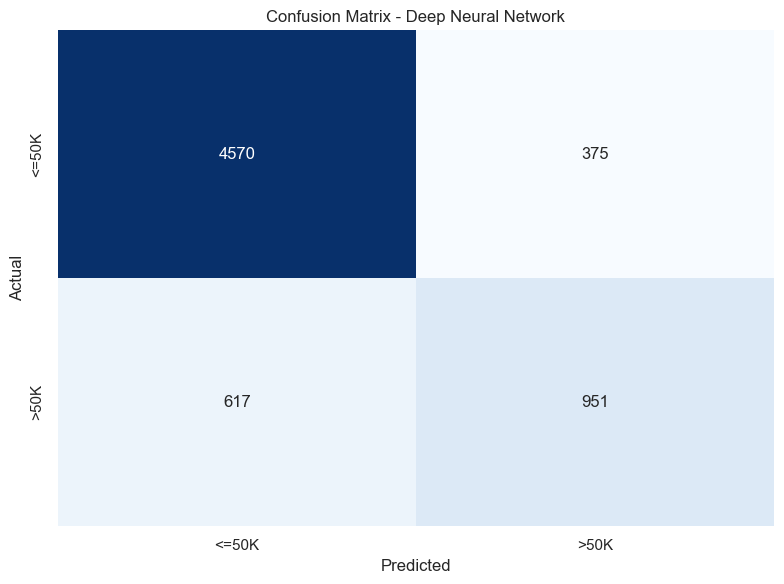

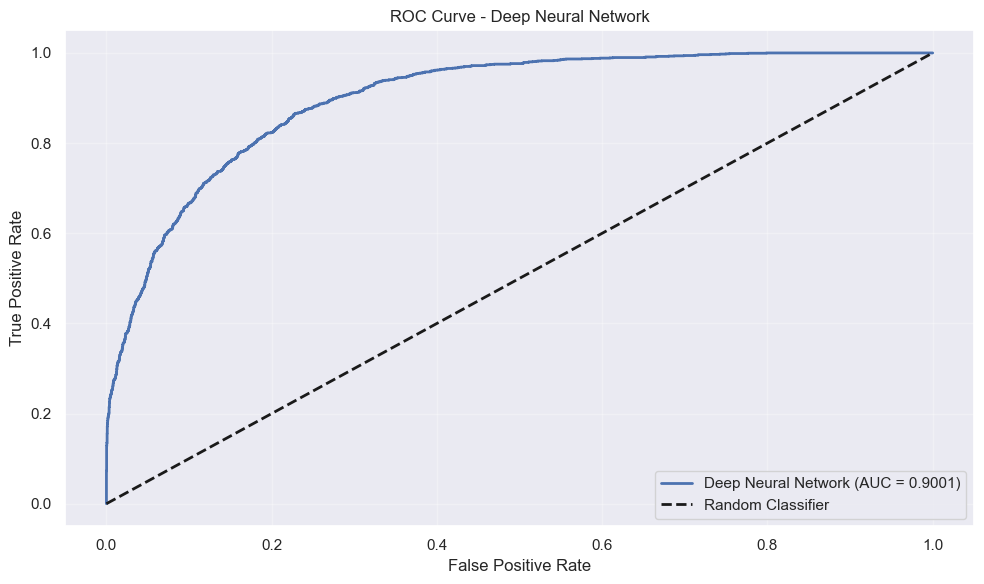


Deep Neural Network Classification Report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4945
        >50K       0.72      0.61      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [19]:
if dnn_model is not None:
    # Evaluate on train and test sets
    print("Deep Neural Network Evaluation:")
    print("="*80)
    
    # Training set evaluation
    train_loss, train_acc, train_prec, train_rec, train_auc = dnn_model.evaluate(
        X_train_scaled, y_train, verbose=0
    )
    train_pred_proba = dnn_model.predict(X_train_scaled, verbose=0).flatten()
    train_pred = (train_pred_proba > 0.5).astype(int)
    train_f1 = f1_score(y_train, train_pred)
    
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Train Precision: {train_prec:.4f}")
    print(f"Train Recall: {train_rec:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}")
    print(f"Train AUC-ROC: {train_auc:.4f}")
    
    # Test set evaluation
    test_loss, test_acc, test_prec, test_rec, test_auc = dnn_model.evaluate(
        X_test_scaled, y_test, verbose=0
    )
    test_pred_proba = dnn_model.predict(X_test_scaled, verbose=0).flatten()
    test_pred = (test_pred_proba > 0.5).astype(int)
    test_f1 = f1_score(y_test, test_pred)
    
    print(f"\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_prec:.4f}")
    print(f"Test Recall: {test_rec:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    print(f"Test AUC-ROC: {test_auc:.4f}")
    
    # Store results for later comparison
    dnn_results = (y_train, train_pred, y_test, test_pred, train_pred_proba, test_pred_proba)
    
    # Confusion matrix
    plot_confusion_matrix(y_test, test_pred, "Deep Neural Network")
    
    # ROC curve
    plot_roc_curve(y_test, test_pred_proba, "Deep Neural Network")
    
    # Classification report
    print("\nDeep Neural Network Classification Report:")
    print("-"*80)
    print(classification_report(y_test, test_pred, target_names=le_target.classes_))
else:
    dnn_results = None

## Training History Visualization

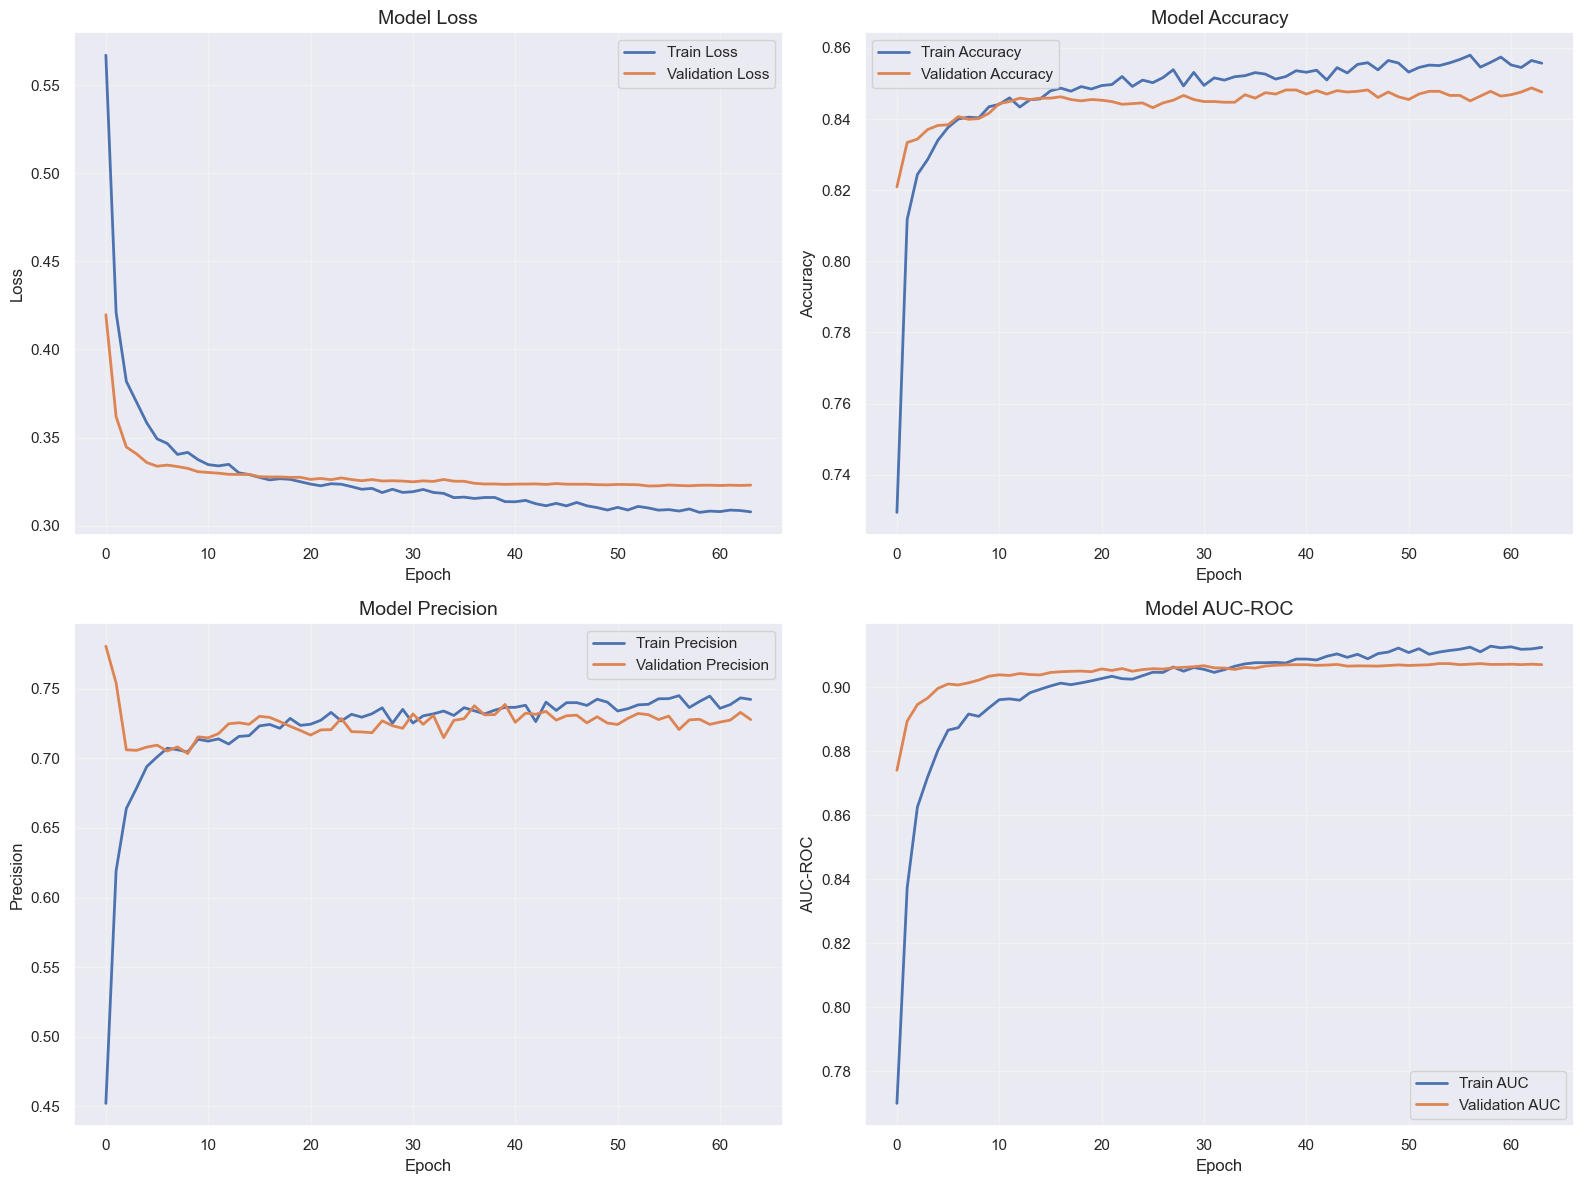


Training Summary:
Total epochs trained: 64
Final train loss: 0.3078
Final validation loss: 0.3230
Final train accuracy: 0.8557
Final validation accuracy: 0.8476
Best validation loss: 0.3225 at epoch 54
Best validation accuracy: 0.8488 at epoch 63


In [21]:
if history is not None:
    # Plot training history
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 0].set_title('Model Loss', fontsize=14)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0, 1].set_title('Model Accuracy', fontsize=14)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train Precision', linewidth=2)
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision', linewidth=2)
    axes[1, 0].set_title('Model Precision', fontsize=14)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # AUC
    axes[1, 1].plot(history.history['auc'], label='Train AUC', linewidth=2)
    axes[1, 1].plot(history.history['val_auc'], label='Validation AUC', linewidth=2)
    axes[1, 1].set_title('Model AUC-ROC', fontsize=14)
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('AUC-ROC')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print training summary
    print("\nTraining Summary:")
    print("="*80)
    print(f"Total epochs trained: {len(history.history['loss'])}")
    print(f"Final train loss: {history.history['loss'][-1]:.4f}")
    print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")
    print(f"Final train accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Best validation loss: {min(history.history['val_loss']):.4f} at epoch {np.argmin(history.history['val_loss']) + 1}")
    print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f} at epoch {np.argmax(history.history['val_accuracy']) + 1}")

## Conclusion

**Summary of the pipeline:**
1. Performed EDA to understand the distribution of features and the target variable (income).
2. Preprocessed data by handling missing values (including '?' placeholders), filling with median/mode, and label encoding categorical features.
3. Split data into training (80%) and testing (20%) sets with stratification to preserve class balance.
4. Trained baseline models (Logistic Regression, Naive Bayes) and advanced tree-based models (Random Forest, LightGBM, XGBoost, CatBoost).
5. Implemented a deep neural network with multiple hidden layers, batch normalization, dropout, and early stopping.
6. Evaluated all models using classification metrics: accuracy, precision, recall, F1 score, and AUC-ROC.
7. Visualized performance through confusion matrices and ROC curves.
8. Analyzed feature importance to understand key predictors of income.
9. Tuned hyperparameters using GridSearchCV to optimize F1 score for tree-based models.
10. Compared all models including the deep learning model and identified the best performer.

**Key Insights:**
- The Adult dataset shows class imbalance with more <=50K instances than >50K.
- Features like education, age, occupation, marital status, and hours per week are strong predictors of income.
- Tree-based ensemble models (Random Forest, XGBoost, LightGBM, CatBoost) generally outperform baseline models.
- The deep neural network provides competitive performance and captures complex non-linear relationships in the data.
- Deep learning models benefit from techniques like batch normalization, dropout for regularization, and early stopping to prevent overfitting.
- Hyperparameter tuning can significantly improve model performance across different model types.
- The '?' values in the dataset represent missing data and were handled during preprocessing.

**Deep Learning Model Architecture:**
- Input layer: 14 features (scaled)
- Hidden layers: 128 → 64 → 32 neurons with ReLU activation
- Regularization: Batch normalization and dropout (0.3) after each hidden layer
- Output layer: 1 neuron with sigmoid activation for binary classification
- Optimizer: Adam with learning rate 0.001
- Loss function: Binary cross-entropy
- Training: Early stopping on validation loss with learning rate reduction on plateau